# PVT - модель флюида в унифлок VBA

В Унифлок VBA реализована модель black oil для моделирования свойств нефти, газа и воды

In [1]:
"""
Импорт унифлока зависит от корректных путей к надстройке
Путь задается вручную в явном виде (так проще всего)
"""

unifloc_path = r'C:\unifloc\unifloc_vba'
unifloc_xlam = unifloc_path +r'\UniflocVBA_7.xlam'
print('Путь к надстройке Unifloc VBA -- '+ unifloc_xlam)

import sys
sys.path.insert(0, unifloc_path) # добавим в путь поиска пакетов python папку где находится репозиторий Unifloc VBA
import unifloc_vba_python_api.python_api as unifloc # импортируем python_api для Unifloc VBA

# создаем объект имеющий доступ к расчетам Unifloc VBA
unf = unifloc.API(unifloc_xlam)

print('объект unf обеспечивает доступ к API Unifloc VBA')

Путь к надстройке Unifloc VBA -- C:\unifloc\unifloc_vba\UniflocVBA_7.xlam
объект unf обеспечивает доступ к API Unifloc VBA


In [2]:
# импортируем дополнительные библиотеки 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# векторизуем нужные функции для удобства построения графиков

PVT_rs_m3m3 = np.vectorize(unf.PVT_rs_m3m3)
PVT_pb_atma = np.vectorize(unf.PVT_pb_atma)
PVT_bo_m3m3 = np.vectorize(unf.PVT_bo_m3m3)
PVT_bg_m3m3 = np.vectorize(unf.PVT_bg_m3m3)
PVT_bw_m3m3 = np.vectorize(unf.PVT_bw_m3m3)
PVT_mu_oil_cP = np.vectorize(unf.PVT_mu_oil_cP)
PVT_mu_gas_cP = np.vectorize(unf.PVT_mu_gas_cP)
PVT_mu_wat_cP = np.vectorize(unf.PVT_mu_wat_cP)
PVT_rho_oil_kgm3 = np.vectorize(unf.PVT_rho_oil_kgm3)
PVT_rho_gas_kgm3 = np.vectorize(unf.PVT_rho_gas_kgm3)
PVT_rho_wat_kgm3 = np.vectorize(unf.PVT_rho_wat_kgm3)
PVT_compressibility_oil_1atm = np.vectorize(unf.PVT_compressibility_oil_1atm)
PVT_compressibility_gas_1atm = np.vectorize(unf.PVT_compressibility_gas_1atm)
PVT_compressibility_wat_1atm = np.vectorize(unf.PVT_compressibility_wat_1atm)

PVT_cp_oil_JkgC = np.vectorize(unf.PVT_cp_oil_JkgC)
PVT_cp_gas_JkgC = np.vectorize(unf.PVT_cp_gas_JkgC)
PVT_cp_wat_JkgC = np.vectorize(unf.PVT_cp_wat_JkgC)
PVT_cv_gas_JkgC = np.vectorize(unf.PVT_cv_gas_JkgC)

PVT_salinity_ppm = np.vectorize(unf.PVT_salinity_ppm)
PVT_ST_oilgas_Nm = np.vectorize(unf.PVT_ST_oilgas_Nm)
PVT_ST_watgas_Nm = np.vectorize(unf.PVT_ST_watgas_Nm)
PVT_z = np.vectorize(unf.PVT_z)

# Задание PVT свойств

Свойства флюида в Унифлок VBA определяются следующими параметрами:
- $\gamma_{gas}$ - `gamma_gas` - удельная плотность газа по воздуху;
- $\gamma_{oil}$ - `gamma_oil` - удельная плотность нефти по воде;
- $\gamma_{wat}$ - `gamma_wat` - удельная плотность воды по воде;
- $r_{sb}$ - `rsb_m3m3`- газосодержание при давлении насыщения (в пласте), м$^3$/м$^3$.

Дополнительно можно задать калибровочные параметры, позволяющие настроить модель на данные замеров:
- $p_b$ - `pb_atma` - давление насыщения, атма;
- $t_{res}$ - `t_res_C` - пластовая температура или температура при которой определено давление насыщения, С;
- $b_{ob}$ - `bob_m3m3` - объемный коэффициент нефти при давлении насыщения и соответствующей температуре, м$^3$/м$^3$;
- $\mu_{ob}$ - `muo_cP` - вязкость нефти при давлении насыщения и соответствующей температуре, сП.

Также можно указать набор корреляций, которые будут использоваться для расчета. Реализованы два набора корреляций:
- `PVT_correlation = 0` набор корреляций на основе корреляций Стендинга;
- `PVT_correlation = 1` набор корреляций на основе корреляций Веларде Мак Кейна.

В унифлок VBA используется упрощенная схема калибровки свойств нефти на значения при давлении насыщения. В некоторых программных продуктах можно встретить более универсальные схемы калибровки, например по нескольким точкам. Реализованной схемы часто оказывается достаточно для практических расчетов.

Для работы с PVT свойствами использует объектная модель флюида как в программной реализации, так и на уровене пользовательских функций. В программной реализации расчет PVT свойств ведется классом `CPVT`. На уровне пользовательских функций свойства флюидов необходимые для проведения расчетов кодируются в json словать с использованием функции `encode_PVT`.

In [4]:
# задаем флюид в виде json словаря задавая все параметры.
# для наглядности используем имена аргументов для задания значений
fluid = unf.encode_PVT(gamma_gas=0.8, 
                       gamma_oil=0.82, 
                       gamma_wat=1.1, 
                       rsb_m3m3=120, 
                       pb_atma=150, 
                       t_res_C=80, 
                       bob_m3m3=1.2, 
                       muob_cP=0.5, 
                       PVT_corr_set=0)
# выведем итоговую json строку
print(fluid)

{"gamma_gas":0.8,"gamma_oil":0.82,"gamma_wat":1.1,"rsb_m3m3":120,"pb_atma":150,"t_res_C":80,"bob_m3m3":1.2,"muob_cP":0.5,"PVT_corr_set":0}


Закодированные в виде json строки свойства флюидов позволяют на основе корреляций рассчитать все необходимые для расчетов параметры флюидов при произвольных значениях давления и температуры. Пример кодирования: `{"gamma_gas":0.8,"gamma_oil":0.82,"gamma_wat":1.1,"rsb_m3m3":120,"pb_atma":150,"t_res_C":80,"bob_m3m3":1.2,"muob_cP":0.5,"PVT_corr_set":0}`.

Расчетные функции для свойств флюидов начинаются с префикса `PVT_`, например функция расчета газосодержания имеет название `PVT_rs_m3m3`. Для всех пользовательских функций возвращающих размерные значения, размерность указывается в явном виде в названии функции. Некоторые функции могут возвращать словари значений в виде json строк, тогда в названии функции размерности не указываются. В Python API названия функций совпадают с названиями унифлок VBA (генерируются автоматически).

In [5]:
# встроенная python функция help может помочь узнать, какие аргументы ожидают функции унифлок vba. 
help(unf.encode_PVT)

Help on method encode_PVT in module unifloc_vba_python_api.python_api:

encode_PVT(gamma_gas=0.6, gamma_oil=0.86, gamma_wat=1, rsb_m3m3=100, pb_atma=0, t_res_C=80, bob_m3m3=0, muob_cP=0, PVT_corr_set=0) method of unifloc_vba_python_api.python_api.API instance
    ========== description ==============
    Функция кодирования параметров PVT в строку,  для передачи PVT свойств в прикладные функции Унифлок.

    ==========  arguments  ==============

        gamma_gas - удельная плотность газа, по воздуху.  по умолчанию const_gg_ = 0.6

        gamma_oil - удельная плотность нефти, по воде.  по умолчанию const_go_ = 0.86

        gamma_wat - удельная плотность воды, по воде.  по умолчанию const_gw_ = 1

        rsb_m3m3 - газосодержание при давлении насыщения, м3/м3.  по умолчанию const_rsb_default = 100

        pb_atma - давление насыщения при заданной температуре, атма.  опциональный калибровочный параметр,  если не задан или = 0, то рассчитается по корреляции.

        t_res_c - пласто

# Зависимость давления насыщения от газосодержания при давлении насыщения

Базовая корреляция применяемая при расчетах позволяет оценить давление насыщения от количества растворенного в нефти газа - $p_b$ vs $r_{sb}$. При фиксированной температуре зависимость монотонная - чем больше газосодержание в нефти, тем больше давление насыщения.

In [6]:
# задаем минимальный набор свойств флюида с газосодержанием
fluid = unf.encode_PVT(gamma_gas=0.8, gamma_oil=0.82, gamma_wat=1.1, 
                       rsb_m3m3=120)
# выведем итоговую json строку
print(fluid)

# по заданному флюиду можно оценить давление насыщения
pb = unf.PVT_pb_atma(t_C = 80, PVT_prop = fluid)
print(f"Давление насыщения pb = {pb}")

{"gamma_gas":0.8,"gamma_oil":0.82,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}
Давление насыщения pb = 146.4261947356527


In [7]:
# аргументы функции расчета давления насыщения
help(unf.PVT_pb_atma)

Help on method PVT_pb_atma in module unifloc_vba_python_api.python_api:

PVT_pb_atma(t_C, PVT_prop='') method of unifloc_vba_python_api.python_api.API instance
    ========== description ==============
    Расчет давления насыщения по известному  газосодержанию при давлении насыщения

    ==========  arguments  ==============

        t_c - температура, с.

        pvt_prop - строка с параметрами флюида,  используйте encode_pvt для ее генерации,  если задана перекрывает остальные параметры



In [8]:
# функция расчета вектора значений давления насыщения по вектору значений газосодержания при давлении насыщения
def pb_arr(gg, go, rsb_arr, t_C=80, PVT_corr_set=0):
    fluid_arr = [unf.encode_PVT(gamma_gas=gg, gamma_oil=go, gamma_wat=1.1, 
                                rsb_m3m3=rsb, PVT_corr_set=PVT_corr_set) 
                 for rsb in rsb_arr]
    return PVT_pb_atma(t_C=t_C, PVT_prop = fluid_arr)   

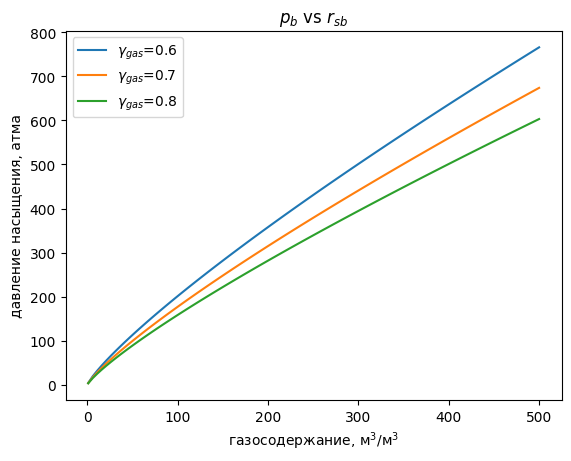

In [9]:
rsb_arr = np.linspace(1,500, 100)
plt.plot(rsb_arr, pb_arr(gg=0.6, go=0.86, rsb_arr=rsb_arr), label="$\\gamma_{gas}$=0.6")
plt.plot(rsb_arr, pb_arr(gg=0.7, go=0.86, rsb_arr=rsb_arr), label="$\\gamma_{gas}$=0.7")
plt.plot(rsb_arr, pb_arr(gg=0.8, go=0.86, rsb_arr=rsb_arr), label="$\\gamma_{gas}$=0.8")

plt.title("$p_b$ vs $r_{sb}$")
plt.xlabel("газосодержание, м$^3$/м$^3$")
plt.ylabel("давление насыщения, атма")
plt.legend()
plt.show() 

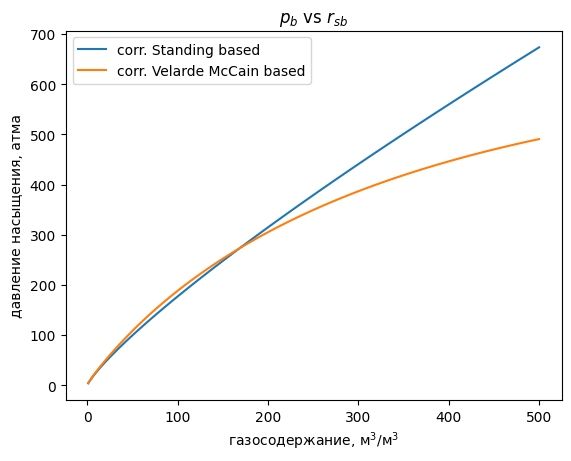

In [10]:
rsb_arr = np.linspace(1,500, 100)
plt.plot(rsb_arr, pb_arr(gg=0.7, go=0.86, rsb_arr=rsb_arr, PVT_corr_set=0), label = "corr. Standing based")
plt.plot(rsb_arr, pb_arr(gg=0.7, go=0.86, rsb_arr=rsb_arr, PVT_corr_set=1), label = "corr. Velarde McCain based")

plt.title("$p_b$ vs $r_{sb}$")
plt.xlabel("газосодержание, м$^3$/м$^3$")
plt.ylabel("давление насыщения, атма")
plt.legend()
plt.show() 

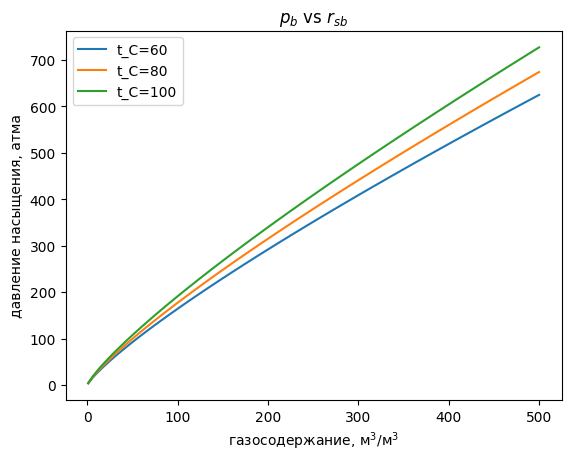

In [11]:
rsb_arr = np.linspace(1,500, 100)
plt.plot(rsb_arr, pb_arr(gg=0.7, go=0.86, rsb_arr=rsb_arr, t_C=60), label="t_C=60")
plt.plot(rsb_arr, pb_arr(gg=0.7, go=0.86, rsb_arr=rsb_arr, t_C=80), label="t_C=80")
plt.plot(rsb_arr, pb_arr(gg=0.7, go=0.86, rsb_arr=rsb_arr, t_C=100), label="t_C=100")

plt.title("$p_b$ vs $r_{sb}$")
plt.xlabel("газосодержание, м$^3$/м$^3$")
plt.ylabel("давление насыщения, атма")
plt.legend()
plt.show() 

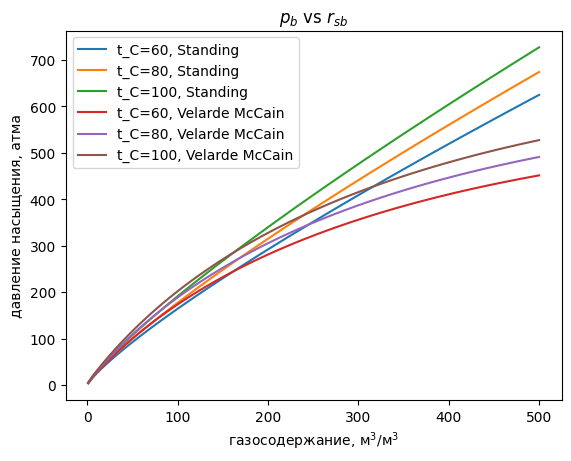

In [12]:
rsb_arr = np.linspace(1,500, 100)
plt.plot(rsb_arr, pb_arr(gg=0.7, go=0.86, rsb_arr=rsb_arr, t_C=60, PVT_corr_set=0), label="t_C=60, Standing")
plt.plot(rsb_arr, pb_arr(gg=0.7, go=0.86, rsb_arr=rsb_arr, t_C=80, PVT_corr_set=0), label="t_C=80, Standing")
plt.plot(rsb_arr, pb_arr(gg=0.7, go=0.86, rsb_arr=rsb_arr, t_C=100, PVT_corr_set=0), label="t_C=100, Standing")

plt.plot(rsb_arr, pb_arr(gg=0.7, go=0.86, rsb_arr=rsb_arr, t_C=60, PVT_corr_set=1), label="t_C=60, Velarde McCain")
plt.plot(rsb_arr, pb_arr(gg=0.7, go=0.86, rsb_arr=rsb_arr, t_C=80, PVT_corr_set=1), label="t_C=80, Velarde McCain")
plt.plot(rsb_arr, pb_arr(gg=0.7, go=0.86, rsb_arr=rsb_arr, t_C=100, PVT_corr_set=1), label="t_C=100, Velarde McCain")

plt.title("$p_b$ vs $r_{sb}$")
plt.xlabel("газосодержание, м$^3$/м$^3$")
plt.ylabel("давление насыщения, атма")
plt.legend()
plt.show() 

# Газосодержание при разгазировании

Чтобы проиллюстрировать важные различия между двумя наборами корреляций построим зависимости давления насыщения от газосодержания в пластовых условиях и зависимости газосодержания от давления при разгазировании на одном графике.

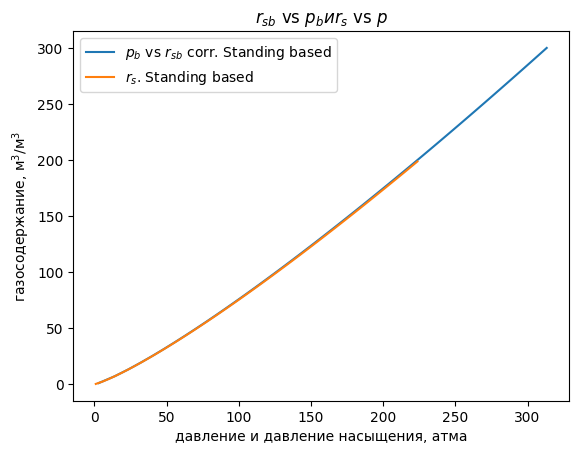

Для корреляции Стендинга кривая разгазирования является обратной к кривой зависимости давления насыщения от газосодержания


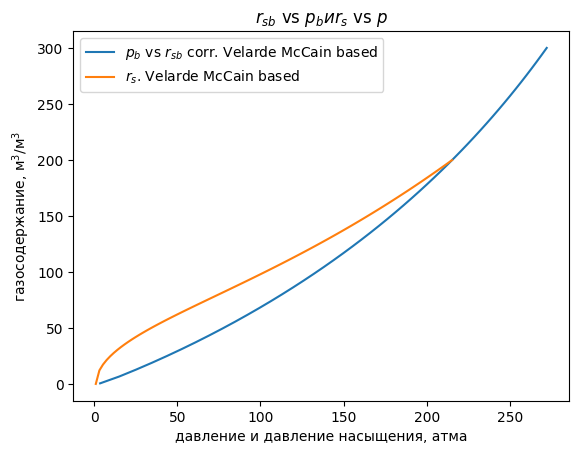

Для корреляции Веларде МакКейна кривая разгазирования отличается от кривой зависимостидавления насыщения от газосодержания, что более физично и учитывает различия растворимости разных компонент газаЧем больше плотность газа отличается от плотности метана, тем больше будет различие.


In [13]:
gg = 0.8
go = 0.82
gw = 1.1
tres = 80
# зададим значение газосодержания с которого будем рассчитывать разгазирование
rsb1 = 200
# зададим массив газосодержаний для графика зависимости давления насыщения от газосодержания
rsb_arr = np.linspace(1,300, 50)
# зададим флюид для разгазирования
fluid = unf.encode_PVT(gamma_gas=gg, gamma_oil=go, gamma_wat=gw, 
                       rsb_m3m3=rsb1, PVT_corr_set=0)
# оценим значение давления насыщения
pb1 = PVT_pb_atma(t_C = tres, PVT_prop = fluid)
# зададим массив давлений для графика газосодержания
parr = np.linspace(1, pb1, 50)

plt.plot(pb_arr(gg=gg, go=go, rsb_arr=rsb_arr, PVT_corr_set=0), rsb_arr, label = "$p_b$ vs $r_{sb}$ corr. Standing based")
plt.plot(parr, PVT_rs_m3m3(parr, tres, fluid), label = "$r_s$. Standing based")

plt.title("$r_{sb}$ vs $p_{b} и r_{s}$ vs $p$")
plt.xlabel("давление и давление насыщения, атма")
plt.ylabel("газосодержание, м$^3$/м$^3$")
plt.legend()
plt.show() 

print("Для корреляции Стендинга кривая разгазирования является обратной к кривой зависимости давления насыщения от газосодержания")

# зададим флюид для разгазирования
fluid = unf.encode_PVT(gamma_gas=gg, gamma_oil=go, gamma_wat=gw, 
                       rsb_m3m3=rsb1, PVT_corr_set=1)
# оценим значение давления насыщения
pb1 = PVT_pb_atma(t_C = tres, PVT_prop = fluid)
# зададим массив давлений для графика газосодержания
parr = np.linspace(1, pb1, 100)

plt.plot(pb_arr(gg=gg, go=go, rsb_arr=rsb_arr, PVT_corr_set=1), rsb_arr, label = "$p_b$ vs $r_{sb}$ corr. Velarde McCain based")
plt.plot(parr, PVT_rs_m3m3(parr, tres, fluid), label = "$r_s$. Velarde McCain based")

plt.title("$r_{sb}$ vs $p_{b} и r_{s}$ vs $p$")
plt.xlabel("давление и давление насыщения, атма")
plt.ylabel("газосодержание, м$^3$/м$^3$")
plt.legend()
plt.show() 

print("Для корреляции Веларде МакКейна кривая разгазирования отличается от кривой зависимости" + 
"давления насыщения от газосодержания, что более физично и учитывает различия растворимости разных компонент газа" + 
"Чем больше плотность газа отличается от плотности метана, тем больше будет различие.")

## Базовые зависимости от давления и температуры

In [14]:
gg = 0.8
go = 0.86
gw = 1.1
rsb = 120
PVT_corr_set = 0
plist = np.linspace(1, 300, 100)


In [15]:
# опишем функцию для отрисовки группы графиков

def plot_pvt(func = PVT_rs_m3m3, 
             pb_atma = -1, 
             t_res_C=80, 
             rsb = 120, 
             muob_cP = -1,
             bob_m3m3 = -1,
             PVT_corr_set=0,
             ylabel='газосодержание, м$^3$/м$^3$', 
             ylog = False
            ):
    
    fluid = unf.encode_PVT(gamma_gas=gg, gamma_oil=go, gamma_wat=gw,  pb_atma=pb_atma, t_res_C = t_res_C, muob_cP = muob_cP, bob_m3m3=bob_m3m3,
                           rsb_m3m3=rsb, PVT_corr_set=PVT_corr_set)
    print(fluid)
    fig, axs = plt.subplots(2, 2, figsize=(12,8))
    axs[0,0].plot(plist, func(p_atma=plist, t_C=40, PVT_prop=fluid), label = "t = 40 °C" )
    axs[0,0].plot(plist, func(p_atma=plist, t_C=80, PVT_prop=fluid), label = "t = 80 °C"  )
    axs[0,0].plot(plist, func(p_atma=plist, t_C=120, PVT_prop=fluid), label = "t = 120 °C"  )
    axs[0,0].set_xlabel('давление, атма')
    axs[0,0].set_ylabel(ylabel)
    if ylog: axs[0,0].set_yscale('log')
    axs[0,0].legend()
    
    rsb_arr = [80, 100, 120]
    fluid_arr = [unf.encode_PVT(gamma_gas=gg, gamma_oil=go, gamma_wat=gw, pb_atma=pb_atma, t_res_C = t_res_C, muob_cP = muob_cP, bob_m3m3=bob_m3m3,
                                rsb_m3m3=rsb_, PVT_corr_set=PVT_corr_set) 
                 for rsb_ in rsb_arr]
    
    axs[0,1].plot(plist, func(p_atma=plist, t_C=80, PVT_prop=fluid_arr[0]), label = "$r_{sb}$ = 80 м$^3$/м$^3$" )
    axs[0,1].plot(plist, func(p_atma=plist, t_C=80, PVT_prop=fluid_arr[1]), label = "$r_{sb}$ = 100 м$^3$/м$^3$"  )
    axs[0,1].plot(plist, func(p_atma=plist, t_C=80, PVT_prop=fluid_arr[2]), label = "$r_{sb}$ = 120 м$^3$/м$^3$"  )
    axs[0,1].set_xlabel('давление, атма')
    axs[0,1].set_ylabel(ylabel)
    if ylog: axs[0,1].set_yscale('log')
    axs[0,1].legend()
    
    
    
    go_arr = [0.82, 0.85, 0.88]
    fluid_arr = [unf.encode_PVT(gamma_gas=gg, gamma_oil=go_, gamma_wat=gw, pb_atma=pb_atma, t_res_C = t_res_C, muob_cP = muob_cP, bob_m3m3=bob_m3m3,
                                rsb_m3m3=rsb, PVT_corr_set=PVT_corr_set) 
                 for go_ in go_arr]
    
    axs[1,0].plot(plist, func(p_atma=plist, t_C=80, PVT_prop=fluid_arr[0]), label = f"$\\gamma_{{oil}}$ = {go_arr[0]}" )
    axs[1,0].plot(plist, func(p_atma=plist, t_C=80, PVT_prop=fluid_arr[1]), label = f"$\\gamma_{{oil}}$ = {go_arr[1]}"  )
    axs[1,0].plot(plist, func(p_atma=plist, t_C=80, PVT_prop=fluid_arr[2]), label = f"$\\gamma_{{oil}}$ = {go_arr[2]}"  )
    axs[1,0].set_xlabel('давление, атма')
    axs[1,0].set_ylabel(ylabel)
    if ylog: axs[1,0].set_yscale('log')
    axs[1,0].legend()
    
    gg_arr = [0.6, 0.7, 0.8]
    fluid_arr = [unf.encode_PVT(gamma_gas=gg_, gamma_oil=go, gamma_wat=gw, pb_atma=pb_atma, t_res_C = t_res_C, muob_cP = muob_cP, bob_m3m3=bob_m3m3,
                                rsb_m3m3=rsb, PVT_corr_set=PVT_corr_set) 
                 for gg_ in gg_arr]
    
    axs[1,1].plot(plist, func(p_atma=plist, t_C=80, PVT_prop=fluid_arr[0]), label = f"$\\gamma_{{gas}}$ = {gg_arr[0]}" )
    axs[1,1].plot(plist, func(p_atma=plist, t_C=80, PVT_prop=fluid_arr[1]), label = f"$\\gamma_{{gas}}$ = {gg_arr[1]}"  )
    axs[1,1].plot(plist, func(p_atma=plist, t_C=80, PVT_prop=fluid_arr[2]), label = f"$\\gamma_{{gas}}$ = {gg_arr[2]}"  )
    axs[1,1].set_xlabel('давление, атма')
    axs[1,1].set_ylabel(ylabel)
    if ylog: axs[1,1].set_yscale('log')
    axs[1,1].legend()

    plt.show()

## Зависимость газосодержания от давления $r_s$ vs $р$

При проведении расчетов без калибровки меняются значения давления насыщения в зависимости от параметров. При задании калибровочного значения давления насыщения - оно перестает меняться при изменении плотностей нефти и газа. Для корреляции Стендинга, например, оказывается, что давление насыщения "важнее" плотности газа. Проследите эти зависимости на графиках. Интересно отметить, что для корреляций на основе Веларде Мак Кейна это не так.

Корреляции на _основе_ корреляции Стендинга, без калибровки
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


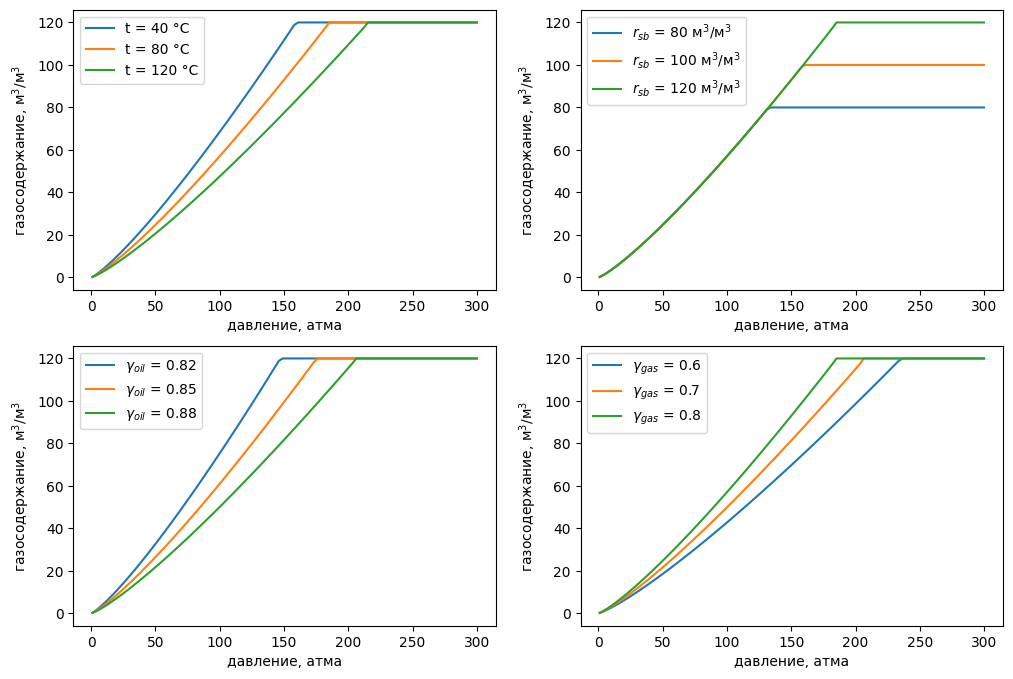

Корреляции на основе корреляции Веларде, Мак Кейна, без калибровки
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":1}


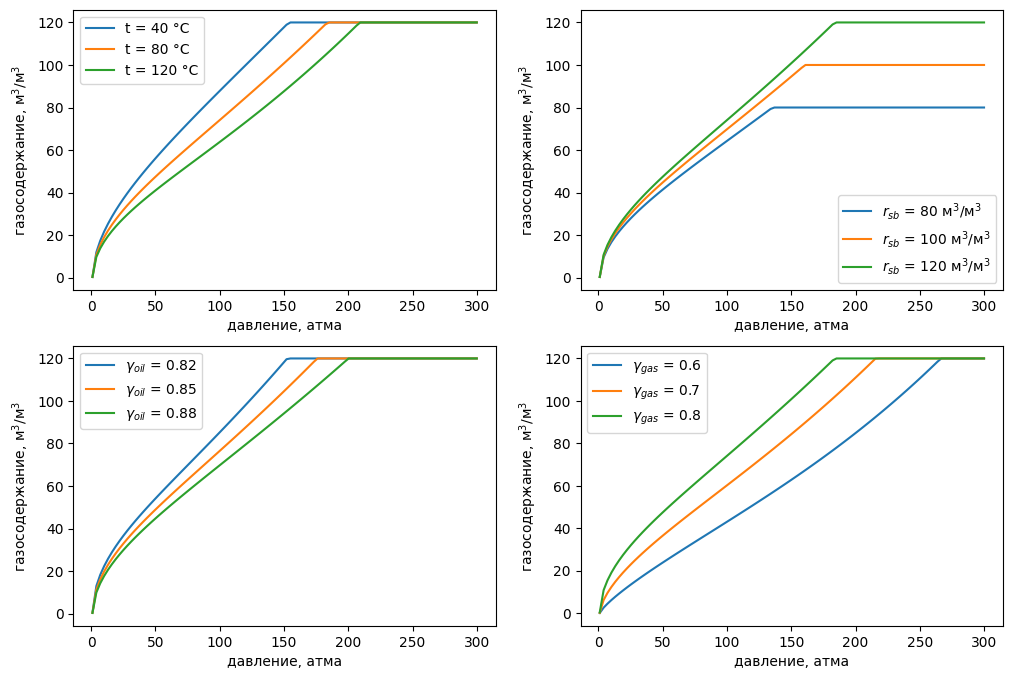

Корреляции на _основе_ корреляции Стендинга, c калибровкой по давлению насыщения
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"pb_atma":120,"t_res_C":80,"muob_cP":1,"PVT_corr_set":0}


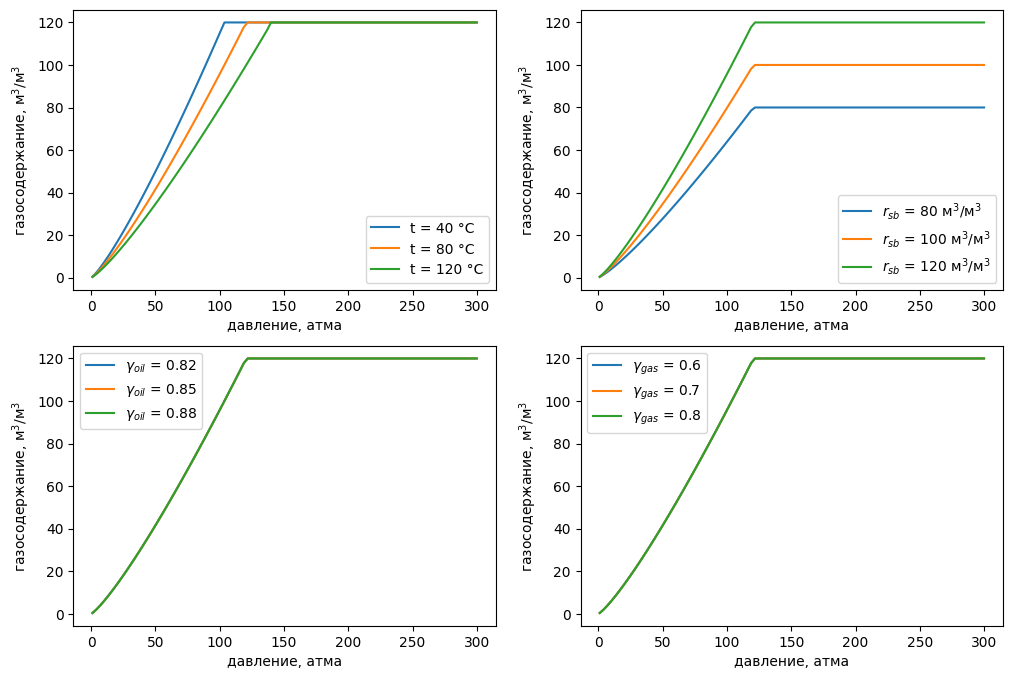

Корреляции на основе корреляции Веларде, Мак Кейна, c калибровкой по давлению насыщения
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"pb_atma":120,"t_res_C":80,"muob_cP":1,"PVT_corr_set":1}


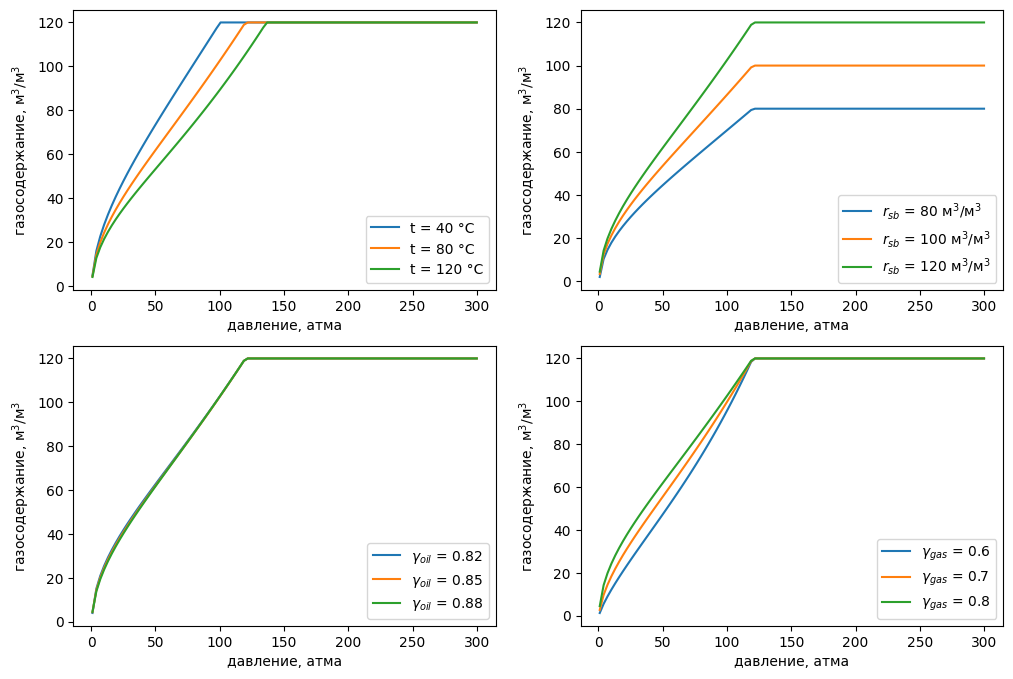

In [16]:
func = PVT_rs_m3m3
ylabel = 'газосодержание, м$^3$/м$^3$'
print("Корреляции на _основе_ корреляции Стендинга, без калибровки")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)

print("Корреляции на основе корреляции Веларде, Мак Кейна, без калибровки")
plot_pvt(func=func, PVT_corr_set=1, pb_atma=-1, ylabel=ylabel)

print("Корреляции на _основе_ корреляции Стендинга, c калибровкой по давлению насыщения")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=120, muob_cP=1, ylabel=ylabel)

print("Корреляции на основе корреляции Веларде, Мак Кейна, c калибровкой по давлению насыщения")
plot_pvt(func=func, PVT_corr_set=1, pb_atma=120, muob_cP=1, ylabel=ylabel)



Ответьте себе на следующие вопросы по графикам
- чем отличаются графики с калибровкой и без калибровок?
- почему при изменении пластовой температуры нет влияния калибровки на давление насыщения?
- почему меняются графики при изменении плотности газа в зависимости от набора корреляций? 

## Зависимость вязкости нефти от давления $\mu_{oil}$ vs $р$

Корреляции на _основе_ корреляции Стендинга, без калибровки
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


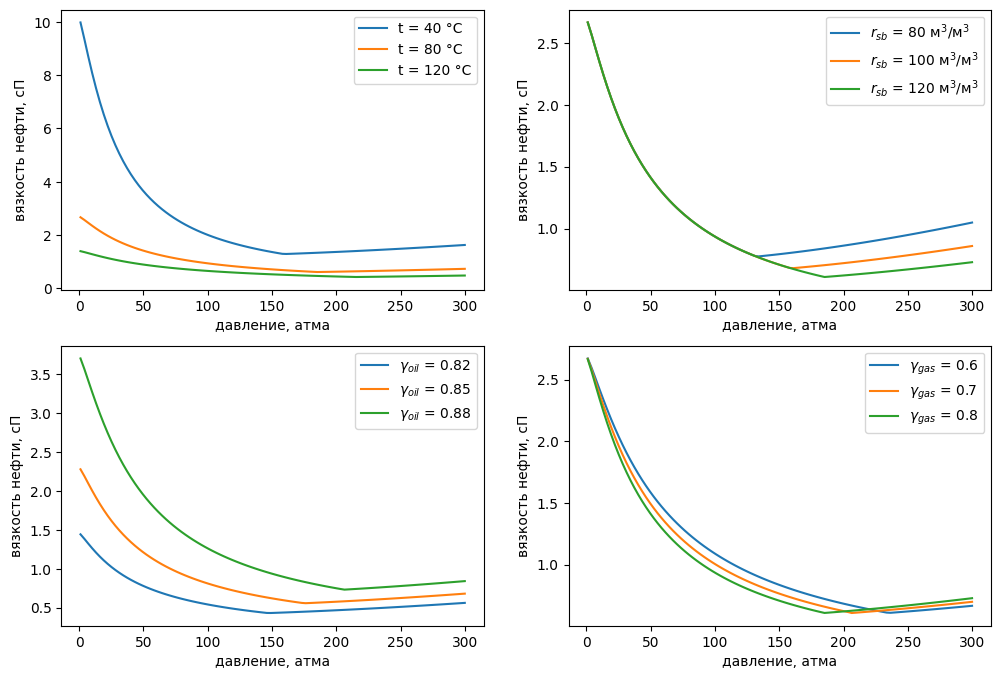

Корреляции на основе корреляции Веларде, Мак Кейна, без калибровки
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":1}


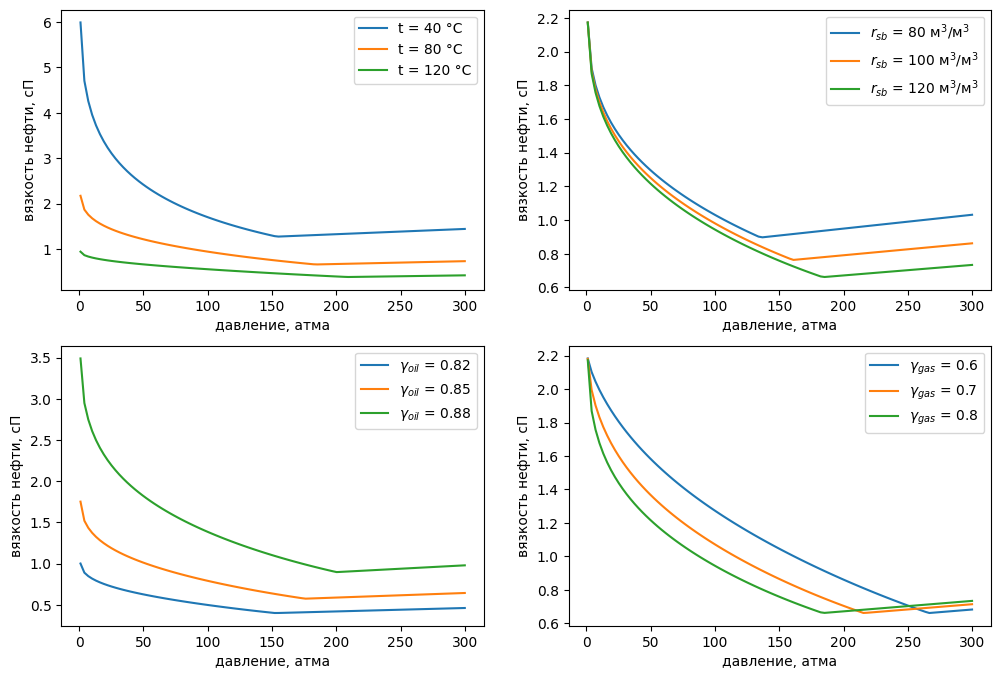

Корреляции на _основе_ корреляции Стендинга, c калибровкой по давлению насыщения
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"pb_atma":120,"t_res_C":80,"muob_cP":1,"PVT_corr_set":0}


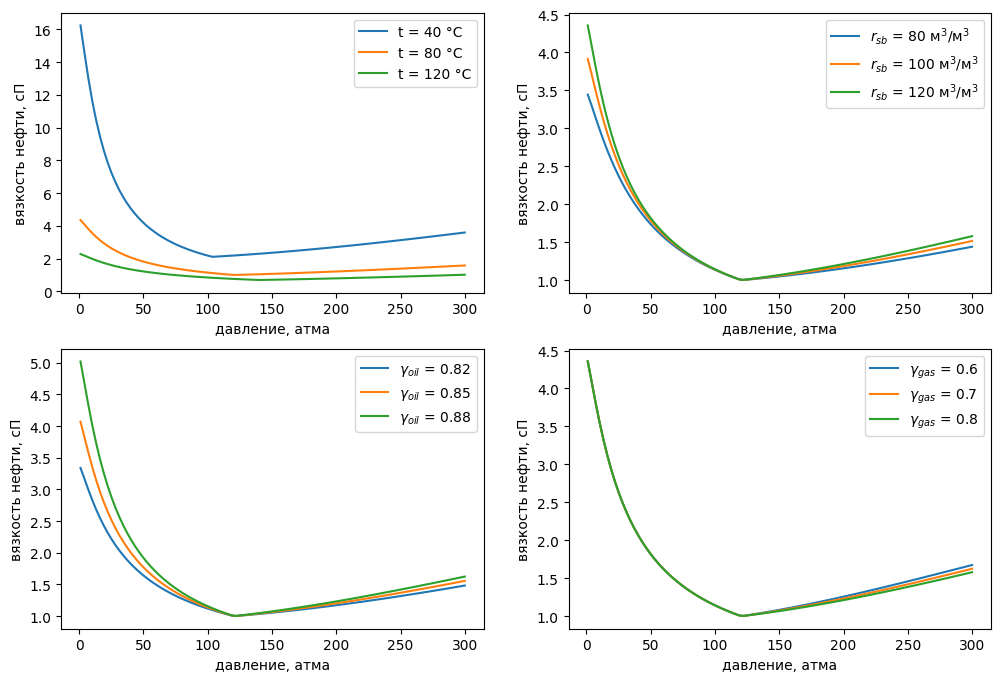

Корреляции на основе корреляции Веларде, Мак Кейна, c калибровкой по давлению насыщения
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"pb_atma":120,"t_res_C":80,"muob_cP":1,"PVT_corr_set":1}


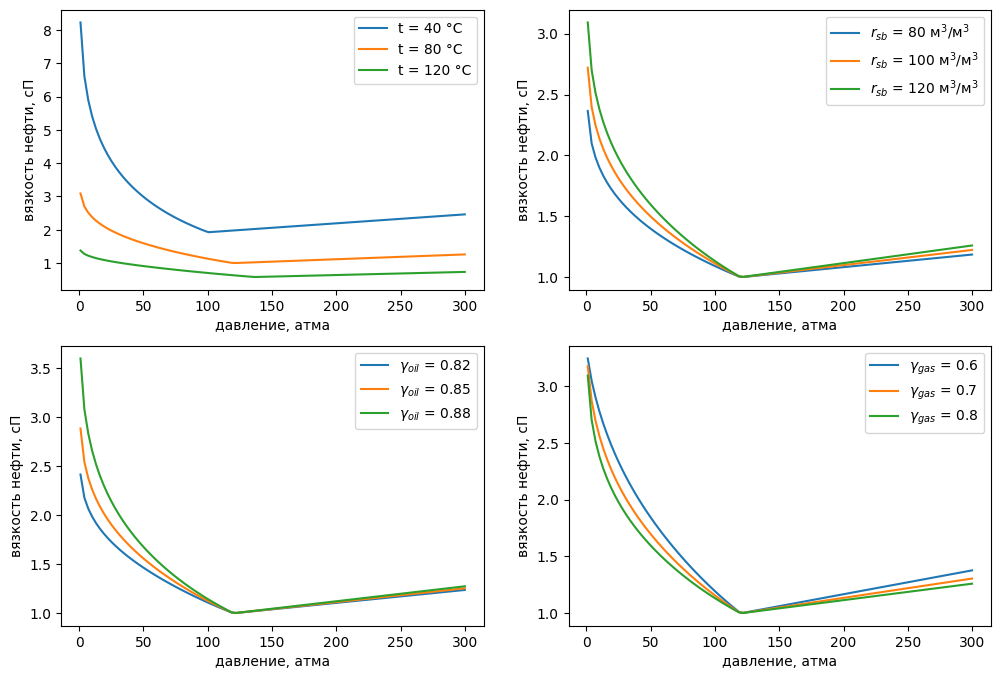

In [17]:

func = PVT_mu_oil_cP
ylabel = 'вязкость нефти, сП'
print("Корреляции на _основе_ корреляции Стендинга, без калибровки")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)

print("Корреляции на основе корреляции Веларде, Мак Кейна, без калибровки")
plot_pvt(func=func, PVT_corr_set=1, pb_atma=-1, ylabel=ylabel)

print("Корреляции на _основе_ корреляции Стендинга, c калибровкой по давлению насыщения")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=120, muob_cP=1, ylabel=ylabel)

print("Корреляции на основе корреляции Веларде, Мак Кейна, c калибровкой по давлению насыщения")
plot_pvt(func=func, PVT_corr_set=1, pb_atma=120, muob_cP=1, ylabel=ylabel)


Корреляции на _основе_ корреляции Стендинга, без калибровки
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


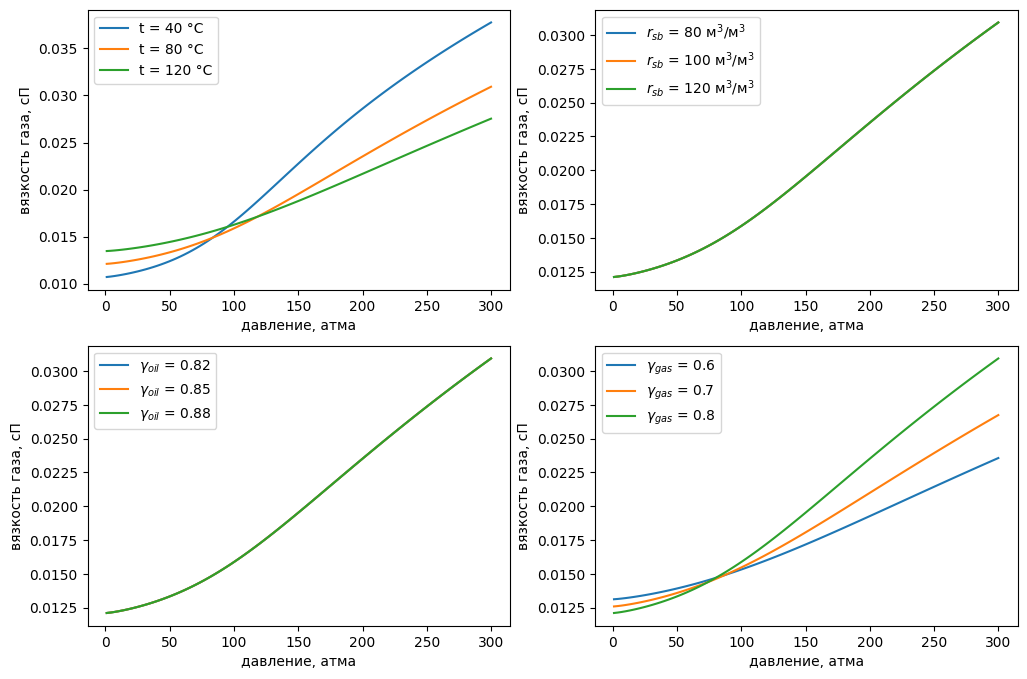

Корреляции на основе корреляции Веларде, Мак Кейна, без калибровки
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":1}


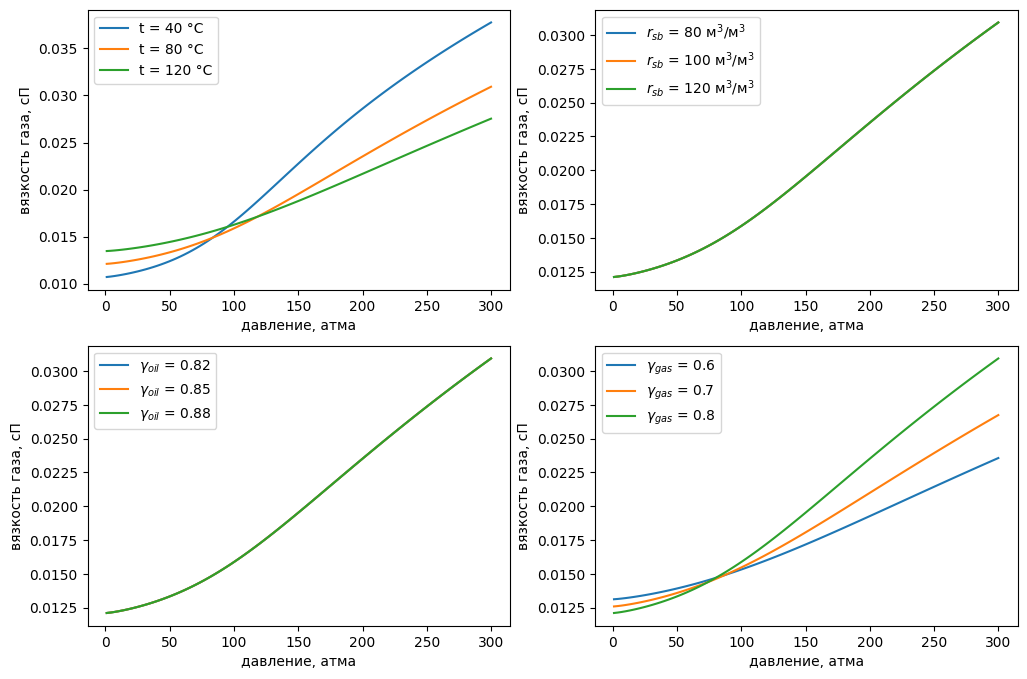

Корреляции на _основе_ корреляции Стендинга, c калибровкой по давлению насыщения
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"pb_atma":120,"t_res_C":80,"muob_cP":1,"PVT_corr_set":0}


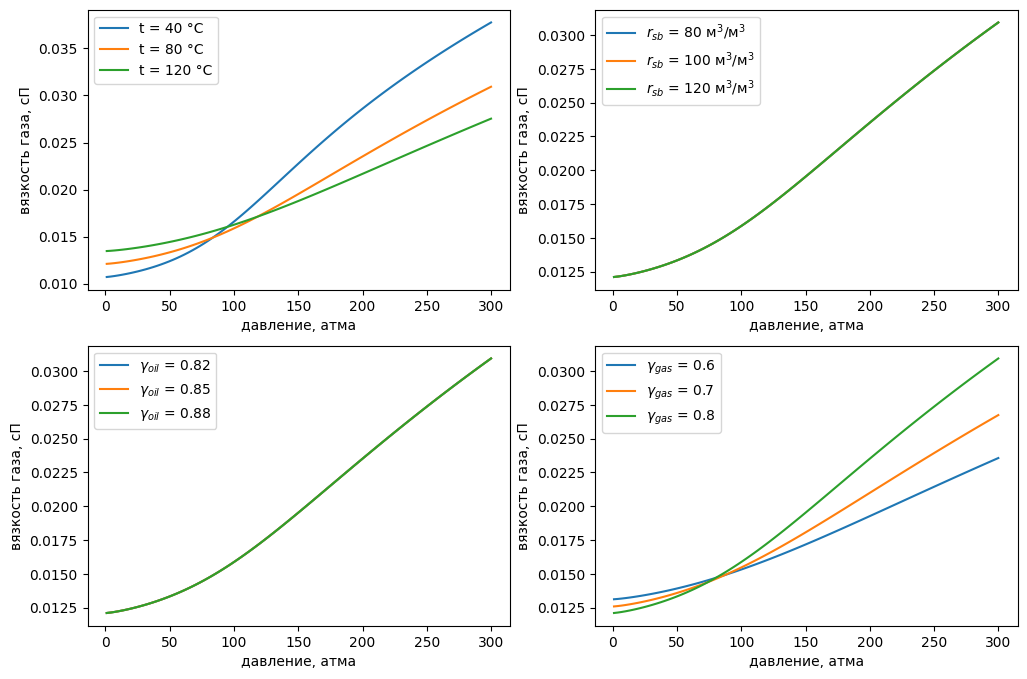

Корреляции на основе корреляции Веларде, Мак Кейна, c калибровкой по давлению насыщения
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"pb_atma":120,"t_res_C":80,"muob_cP":1,"PVT_corr_set":1}


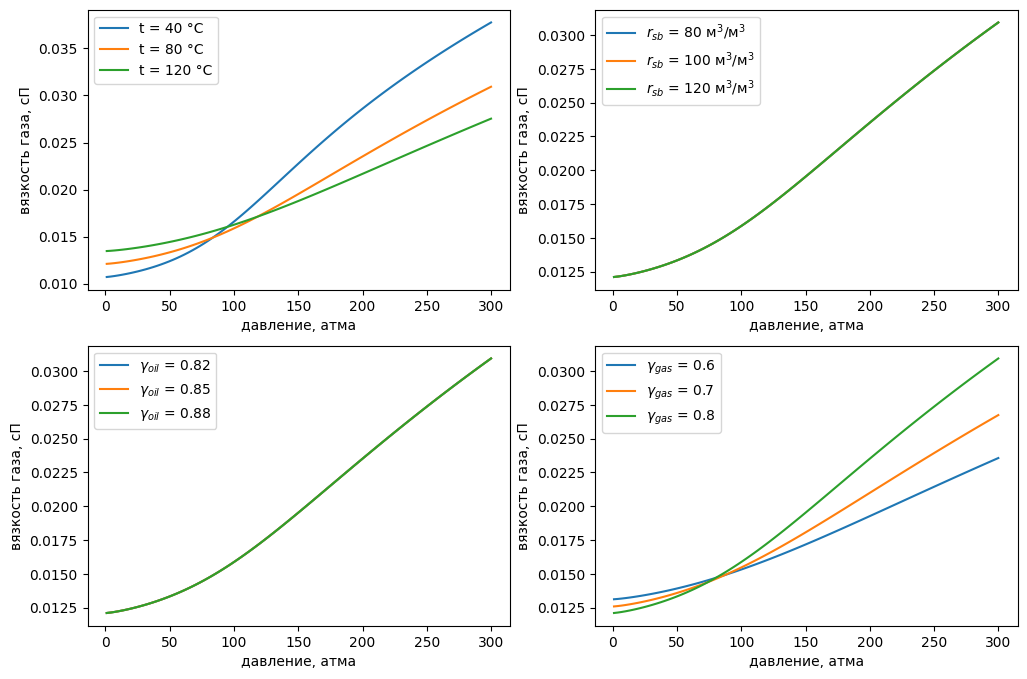

In [18]:
func = PVT_mu_gas_cP
ylabel = 'вязкость газа, сП'
print("Корреляции на _основе_ корреляции Стендинга, без калибровки")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)

print("Корреляции на основе корреляции Веларде, Мак Кейна, без калибровки")
plot_pvt(func=func, PVT_corr_set=1, pb_atma=-1, ylabel=ylabel)

print("Корреляции на _основе_ корреляции Стендинга, c калибровкой по давлению насыщения")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=120, muob_cP=1, ylabel=ylabel)

print("Корреляции на основе корреляции Веларде, Мак Кейна, c калибровкой по давлению насыщения")
plot_pvt(func=func, PVT_corr_set=1, pb_atma=120, muob_cP=1, ylabel=ylabel)


Корреляции на _основе_ корреляции Стендинга, без калибровки
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


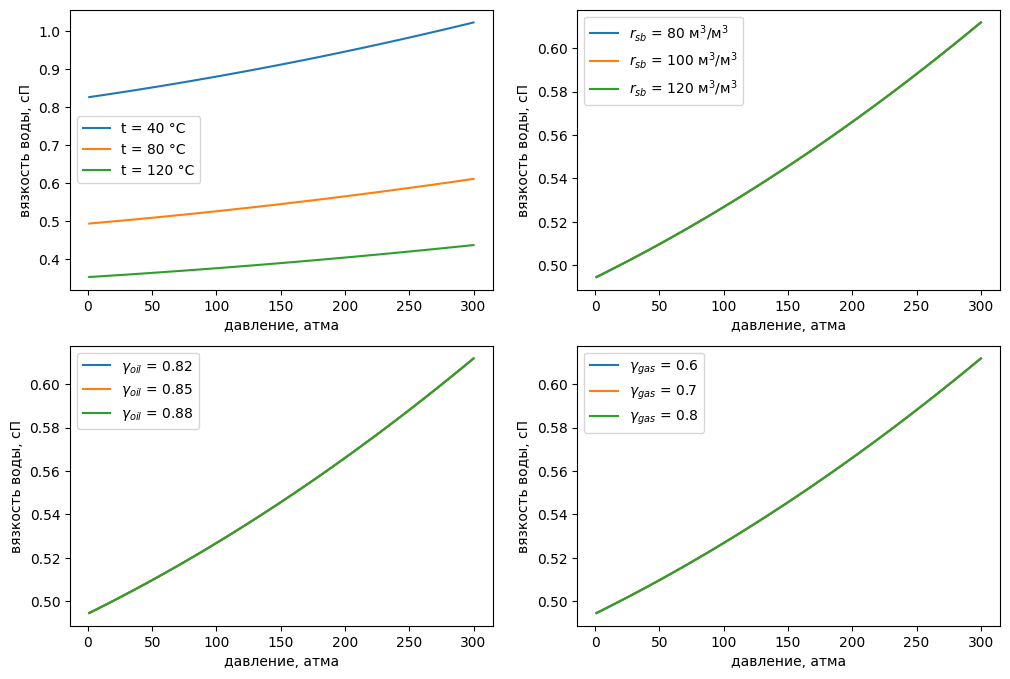

Корреляции на основе корреляции Веларде, Мак Кейна, без калибровки
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":1}


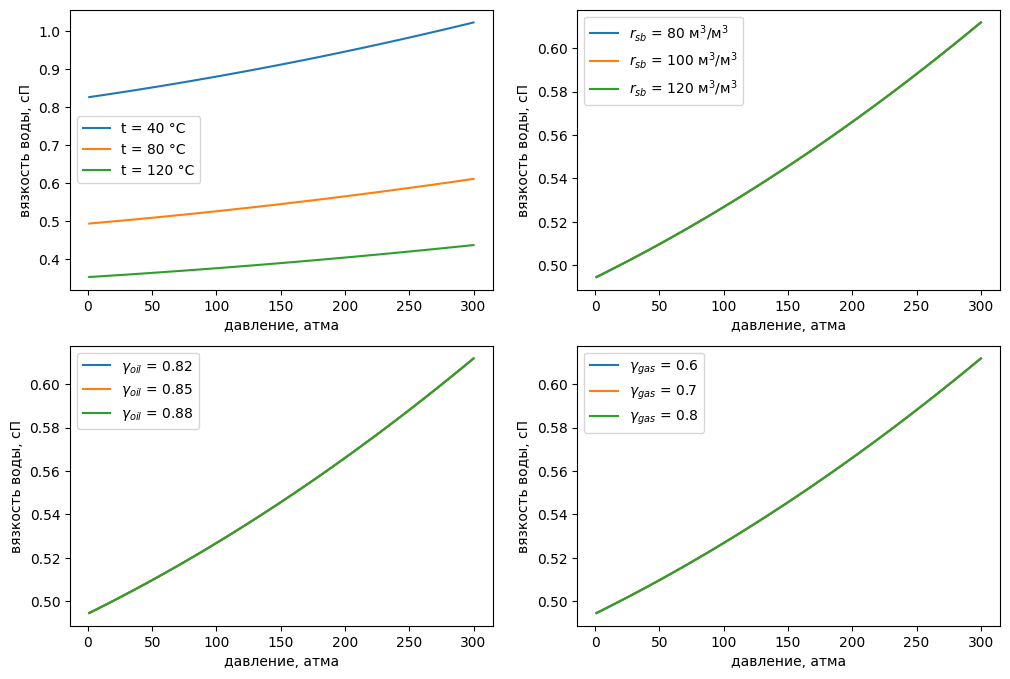

Корреляции на _основе_ корреляции Стендинга, c калибровкой по давлению насыщения
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"pb_atma":120,"t_res_C":80,"muob_cP":1,"PVT_corr_set":0}


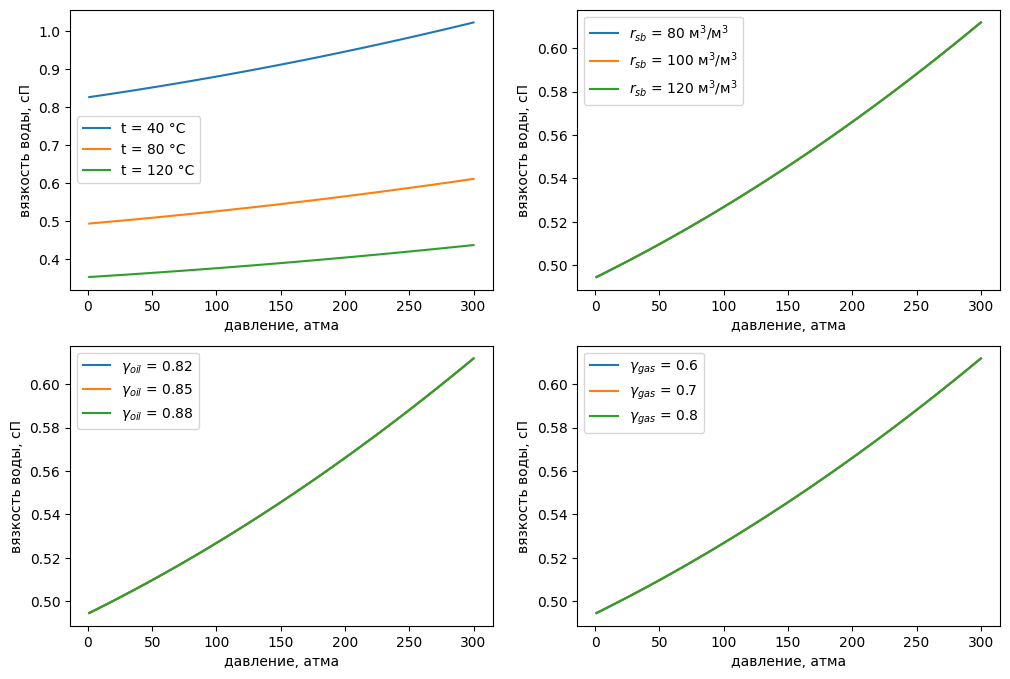

Корреляции на основе корреляции Веларде, Мак Кейна, c калибровкой по давлению насыщения
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"pb_atma":120,"t_res_C":80,"muob_cP":1,"PVT_corr_set":1}


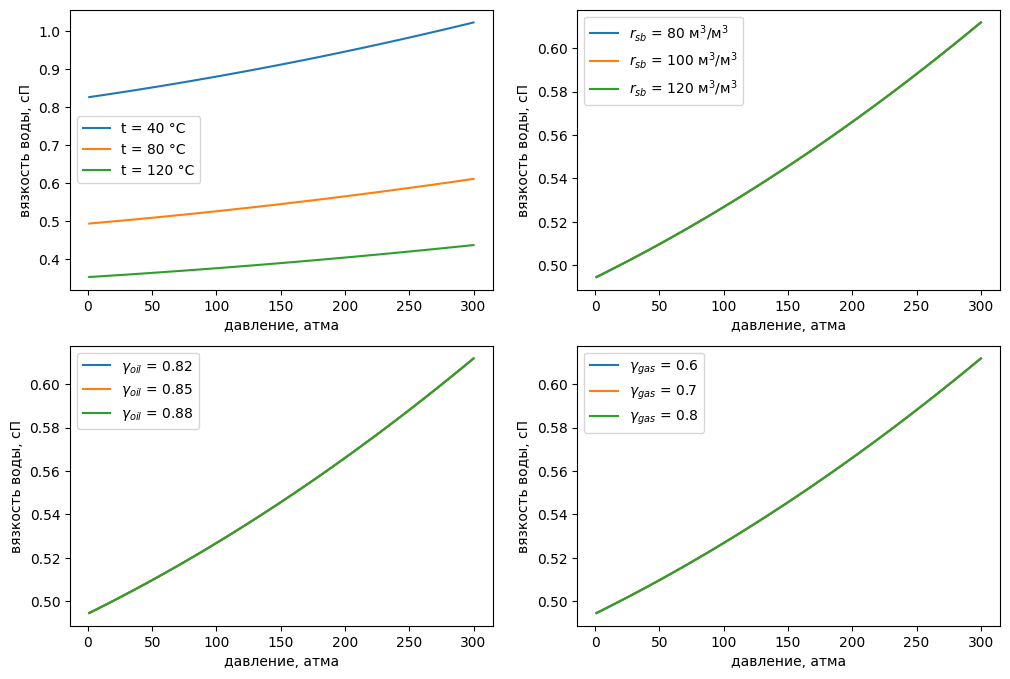

In [19]:
func = PVT_mu_wat_cP
ylabel = 'вязкость воды, сП'
print("Корреляции на _основе_ корреляции Стендинга, без калибровки")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)

print("Корреляции на основе корреляции Веларде, Мак Кейна, без калибровки")
plot_pvt(func=func, PVT_corr_set=1, pb_atma=-1, ylabel=ylabel)

print("Корреляции на _основе_ корреляции Стендинга, c калибровкой по давлению насыщения")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=120, muob_cP=1, ylabel=ylabel)

print("Корреляции на основе корреляции Веларде, Мак Кейна, c калибровкой по давлению насыщения")
plot_pvt(func=func, PVT_corr_set=1, pb_atma=120, muob_cP=1, ylabel=ylabel)


Корреляции на _основе_ корреляции Стендинга, без калибровки
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


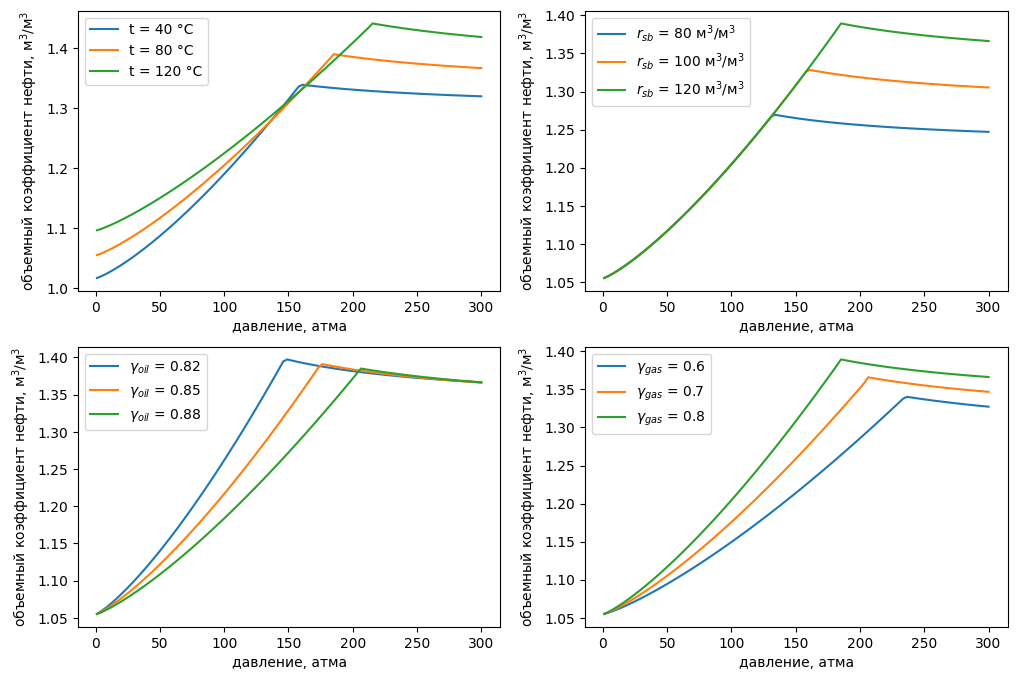

Корреляции на основе корреляции Веларде, Мак Кейна, без калибровки
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":1}


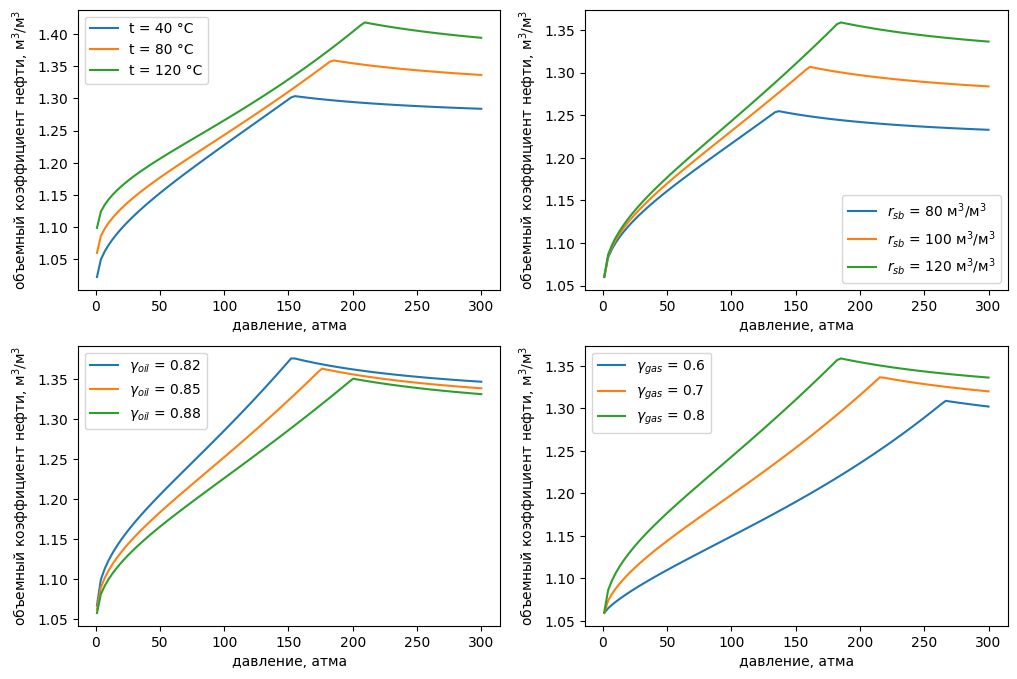

Корреляции на _основе_ корреляции Стендинга, c калибровкой по давлению насыщения
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"pb_atma":120,"t_res_C":80,"bob_m3m3":1.2,"muob_cP":1,"PVT_corr_set":0}


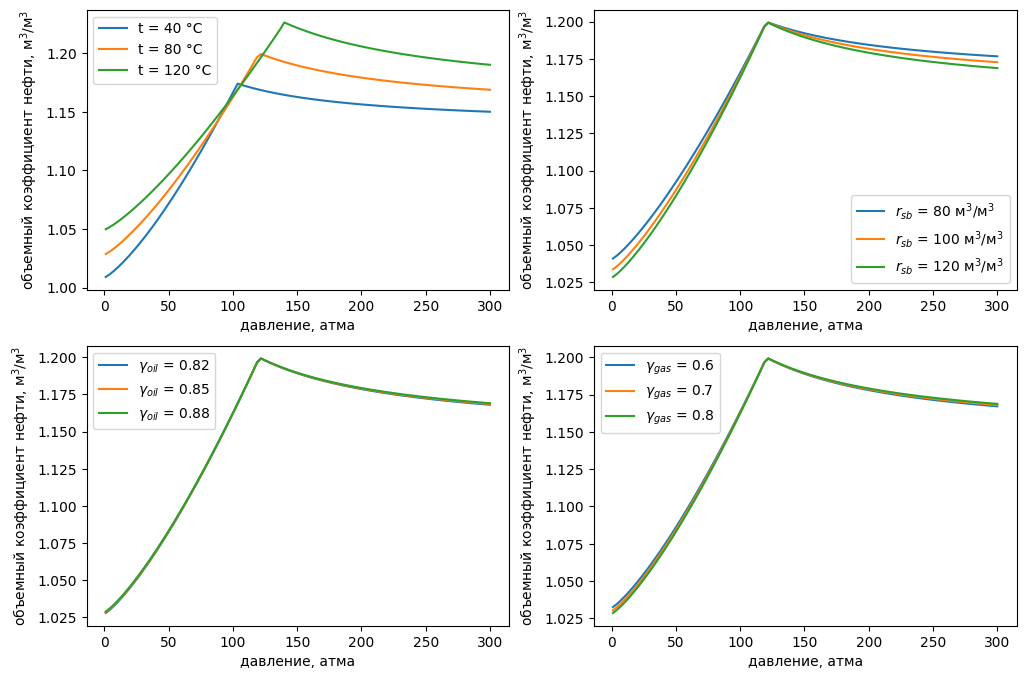

Корреляции на основе корреляции Веларде, Мак Кейна, c калибровкой по давлению насыщения
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"pb_atma":120,"t_res_C":80,"bob_m3m3":1.2,"muob_cP":1,"PVT_corr_set":1}


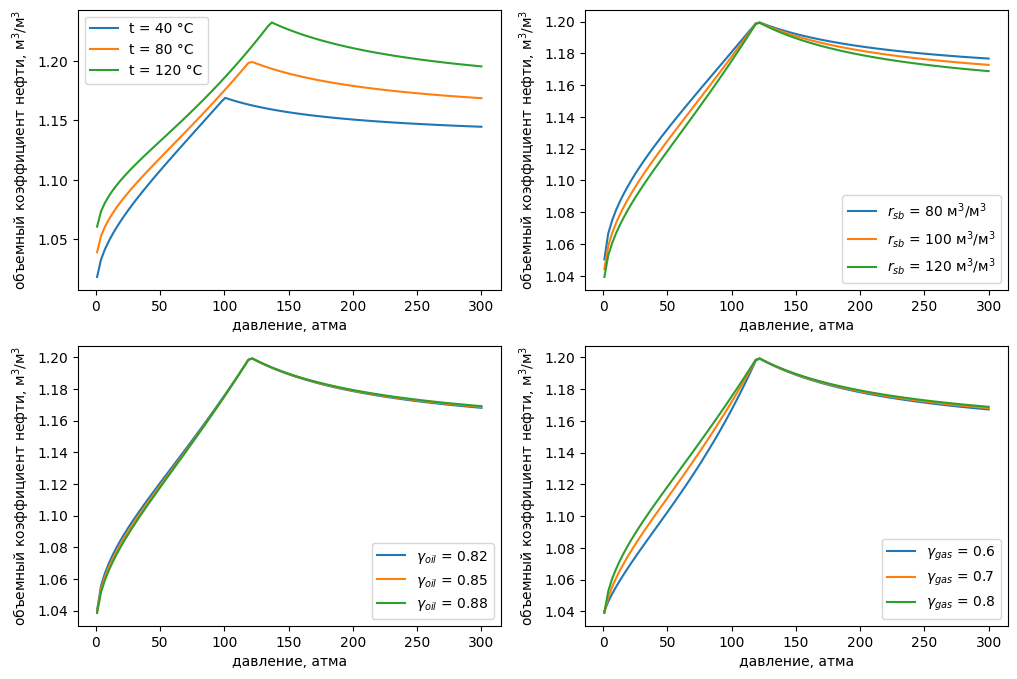

In [20]:
func = PVT_bo_m3m3
ylabel = 'объемный коэффициент нефти, м$^3$/м$^3$'
print("Корреляции на _основе_ корреляции Стендинга, без калибровки")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)

print("Корреляции на основе корреляции Веларде, Мак Кейна, без калибровки")
plot_pvt(func=func, PVT_corr_set=1, pb_atma=-1, ylabel=ylabel)

print("Корреляции на _основе_ корреляции Стендинга, c калибровкой по давлению насыщения")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=120, muob_cP=1, bob_m3m3=1.2, ylabel=ylabel)

print("Корреляции на основе корреляции Веларде, Мак Кейна, c калибровкой по давлению насыщения")
plot_pvt(func=func, PVT_corr_set=1, pb_atma=120, muob_cP=1, bob_m3m3=1.2, ylabel=ylabel)

Корреляции не зависят от набора корреляций и калибровок
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


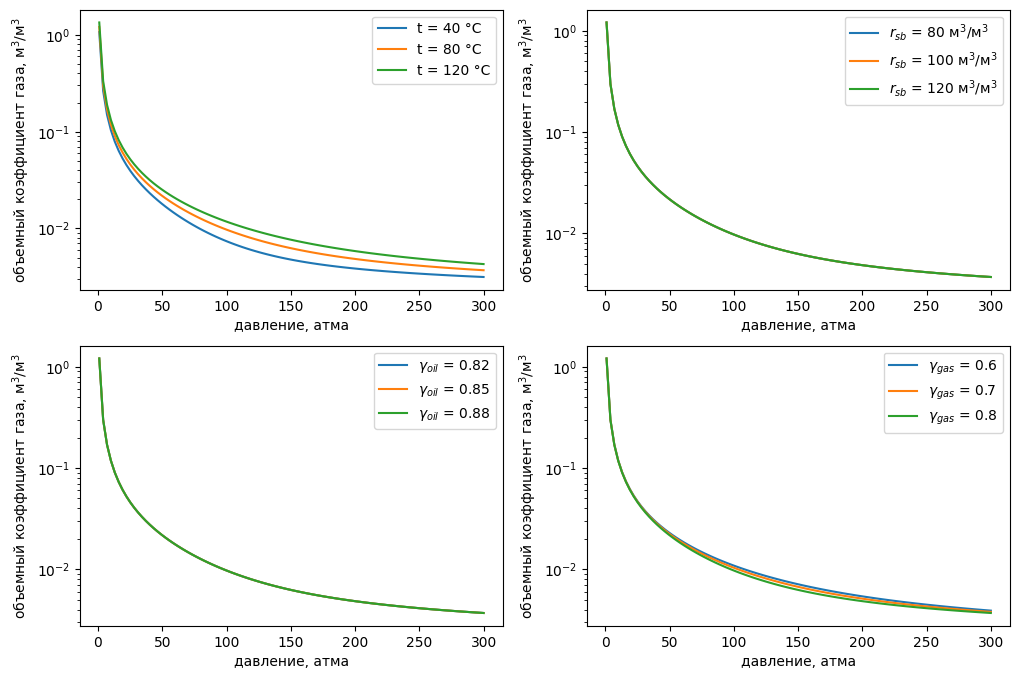

In [21]:
func = PVT_bg_m3m3
ylabel = 'объемный коэффициент газа, м$^3$/м$^3$'
print("Корреляции не зависят от набора корреляций и калибровок")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel, ylog=True)


Корреляции не зависят от набора корреляций и калибровок
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


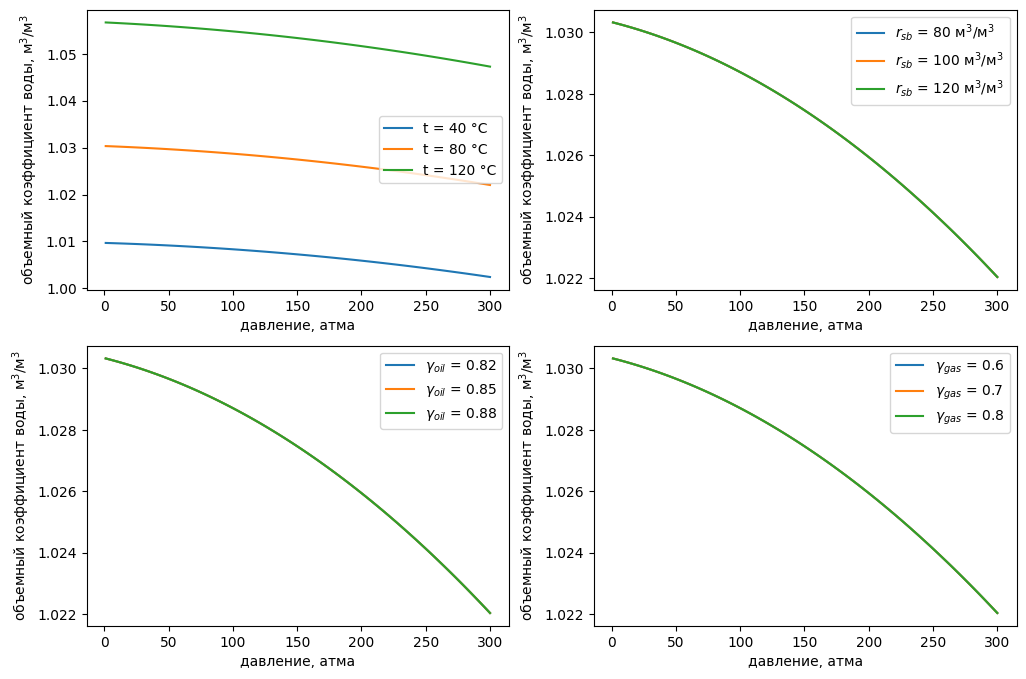

In [22]:
func = PVT_bw_m3m3
ylabel = 'объемный коэффициент воды, м$^3$/м$^3$'
print("Корреляции не зависят от набора корреляций и калибровок")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)


Корреляции на _основе_ корреляции Стендинга, без калибровки
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


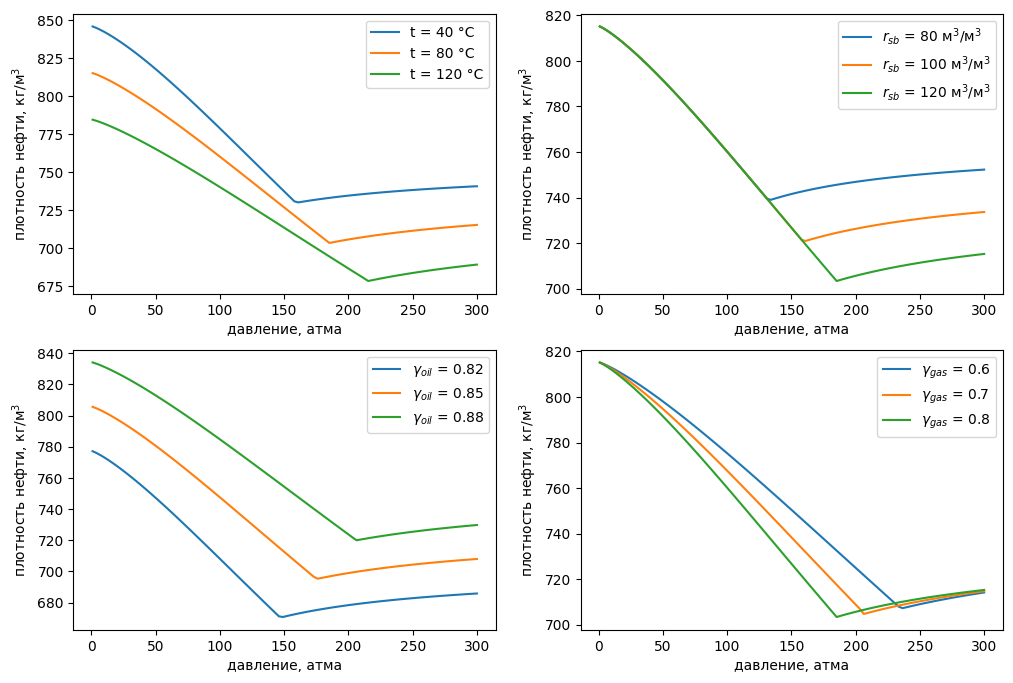

Корреляции на основе корреляции Веларде, Мак Кейна, без калибровки
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":1}


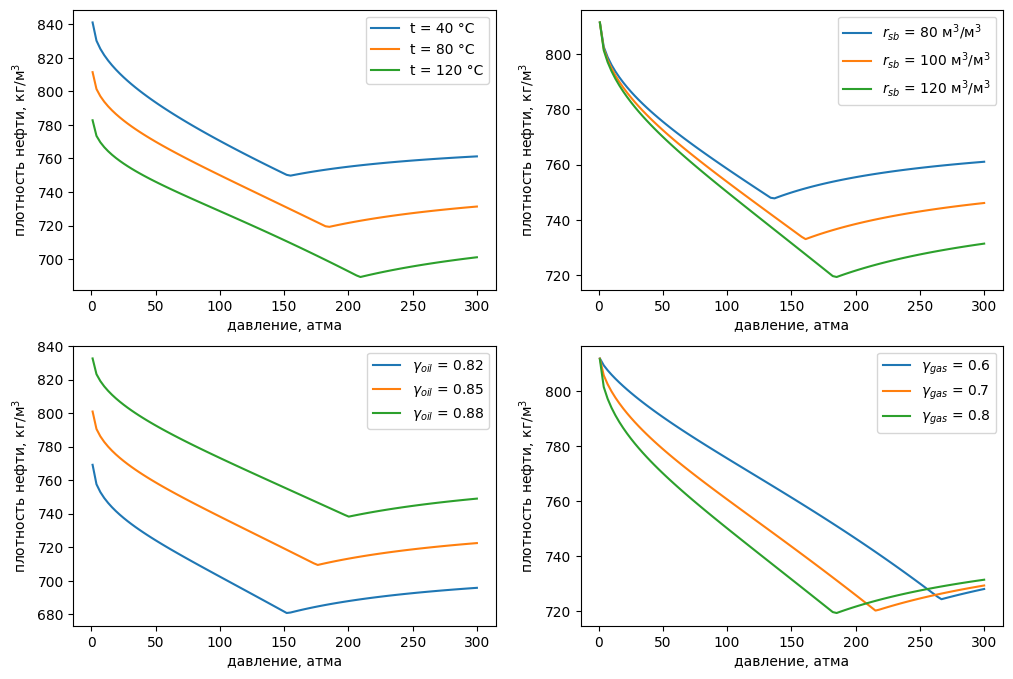

Корреляции на _основе_ корреляции Стендинга, c калибровкой по давлению насыщения
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"pb_atma":120,"t_res_C":80,"bob_m3m3":1.2,"muob_cP":1,"PVT_corr_set":0}


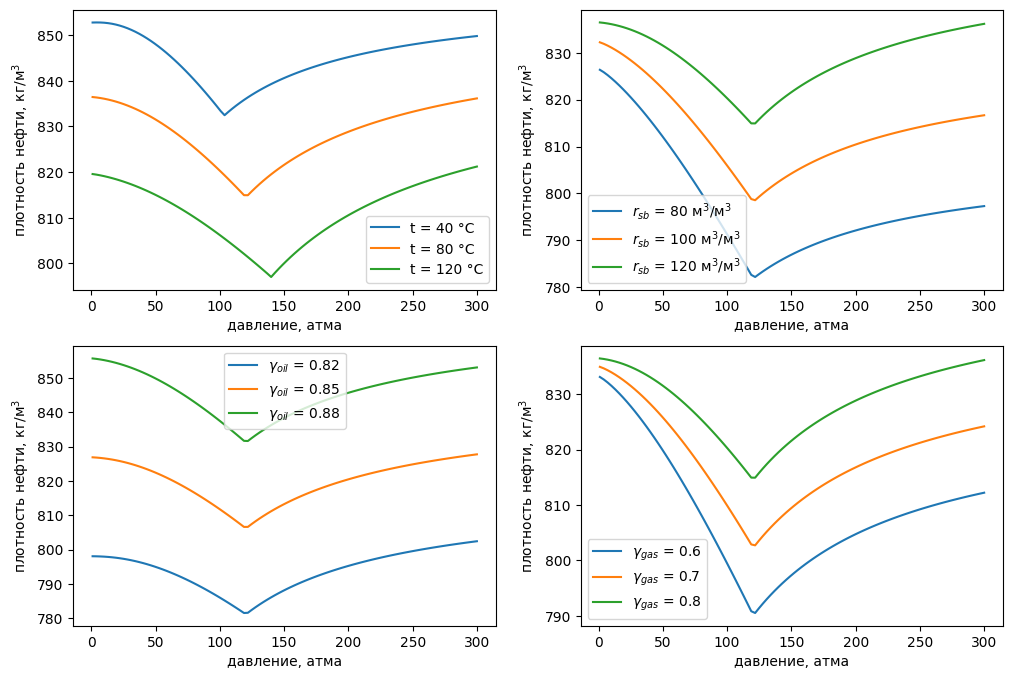

Корреляции на основе корреляции Веларде, Мак Кейна, c калибровкой по давлению насыщения
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"pb_atma":120,"t_res_C":80,"bob_m3m3":1.2,"muob_cP":1,"PVT_corr_set":1}


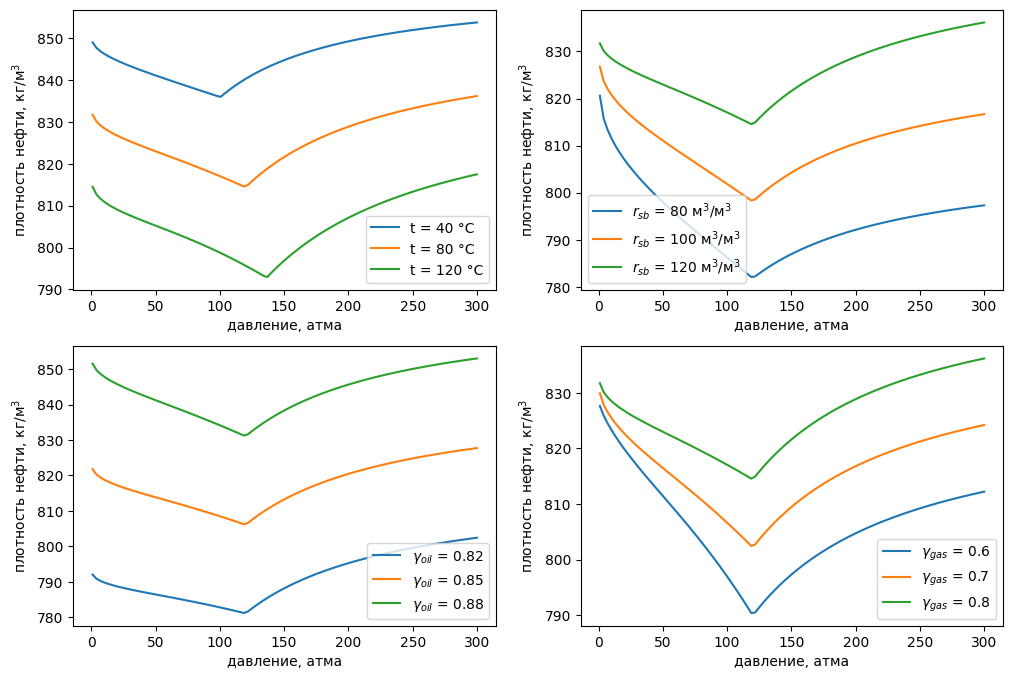

In [23]:
func = PVT_rho_oil_kgm3
ylabel = 'плотность нефти, кг/м$^3$'
print("Корреляции на _основе_ корреляции Стендинга, без калибровки")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)

print("Корреляции на основе корреляции Веларде, Мак Кейна, без калибровки")
plot_pvt(func=func, PVT_corr_set=1, pb_atma=-1, ylabel=ylabel)

print("Корреляции на _основе_ корреляции Стендинга, c калибровкой по давлению насыщения")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=120, muob_cP=1, bob_m3m3=1.2, ylabel=ylabel)

print("Корреляции на основе корреляции Веларде, Мак Кейна, c калибровкой по давлению насыщения")
plot_pvt(func=func, PVT_corr_set=1, pb_atma=120, muob_cP=1, bob_m3m3=1.2, ylabel=ylabel)

Корреляции для плотности газа не зависят от набора корреляций и калибровок
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


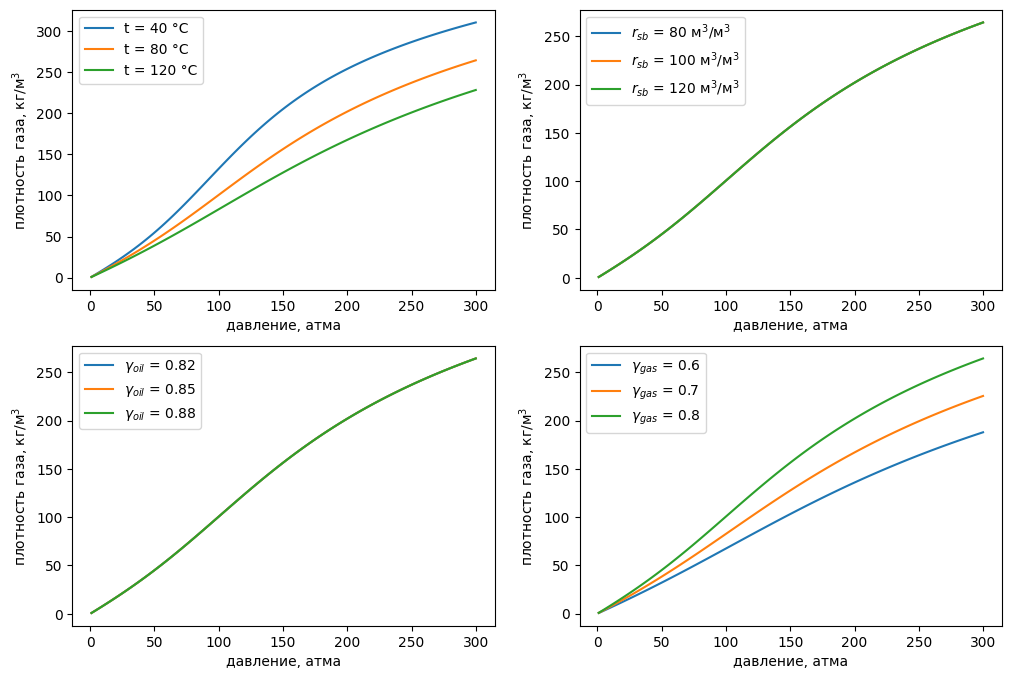

In [24]:
func = PVT_rho_gas_kgm3
ylabel = 'плотность газа, кг/м$^3$'
print("Корреляции для плотности газа не зависят от набора корреляций и калибровок")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)



Корреляции на плотности воды не зависят от набора и калибровок
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


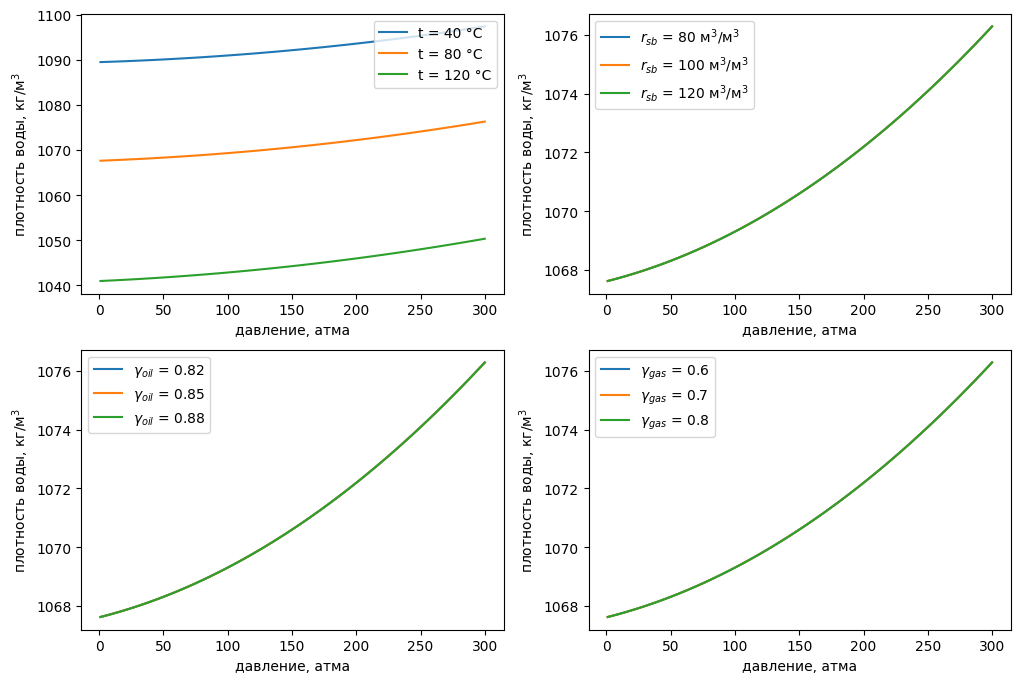

In [25]:
func = PVT_rho_wat_kgm3
ylabel = 'плотность воды, кг/м$^3$'
print("Корреляции на плотности воды не зависят от набора и калибровок")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)


Корреляции на _основе_ корреляции Стендинга, без калибровки
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


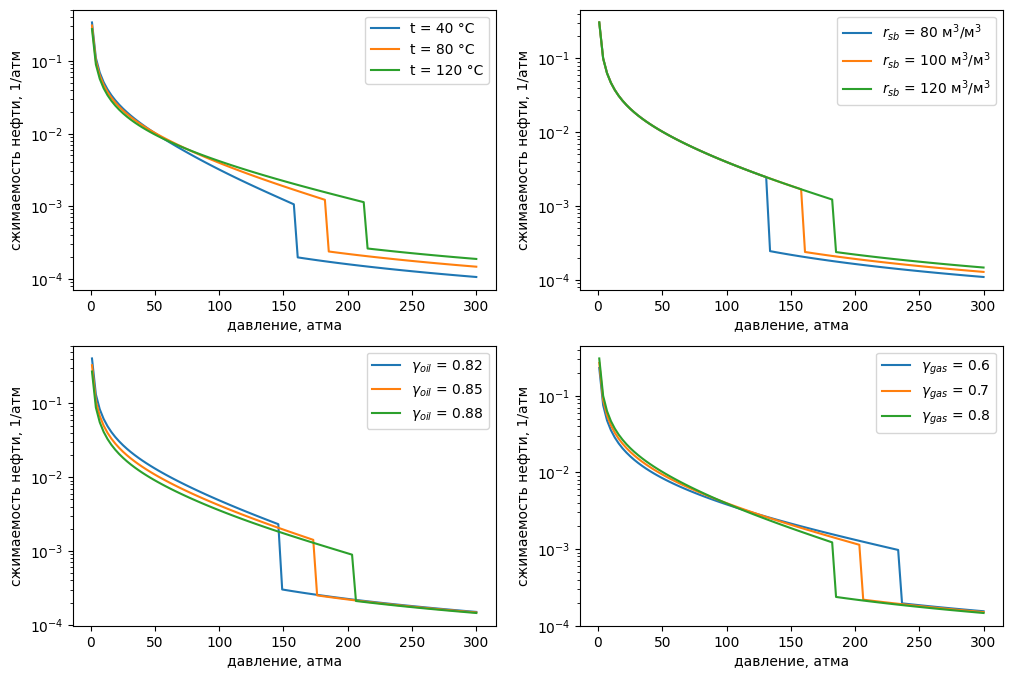

Корреляции на основе корреляции Веларде, Мак Кейна, без калибровки
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":1}


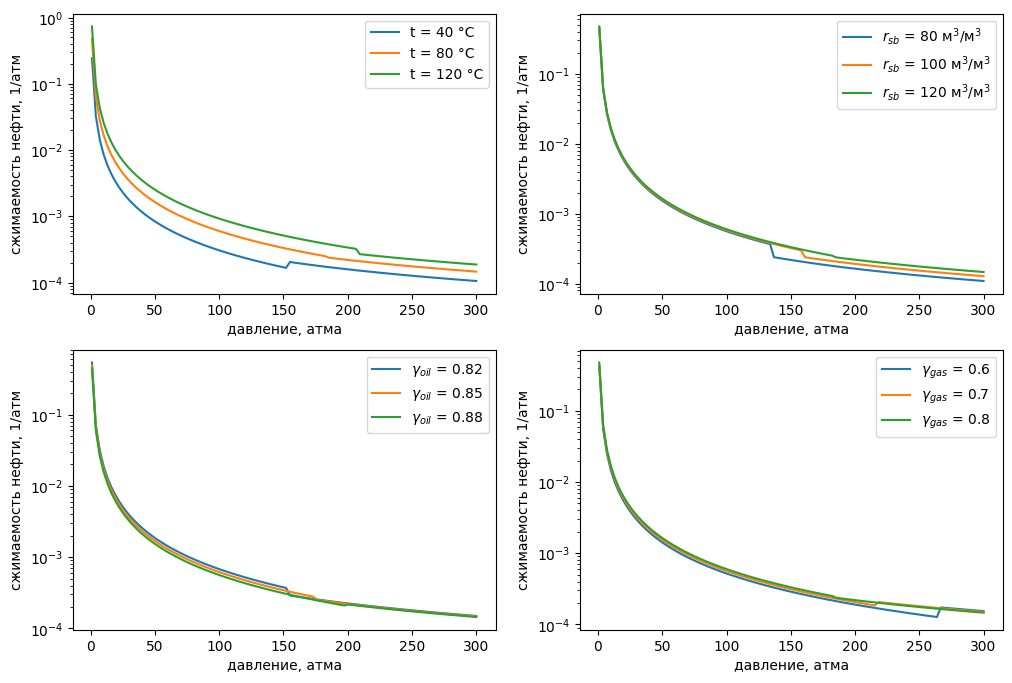

Корреляции на _основе_ корреляции Стендинга, c калибровкой по давлению насыщения
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"pb_atma":120,"t_res_C":80,"muob_cP":1,"PVT_corr_set":0}


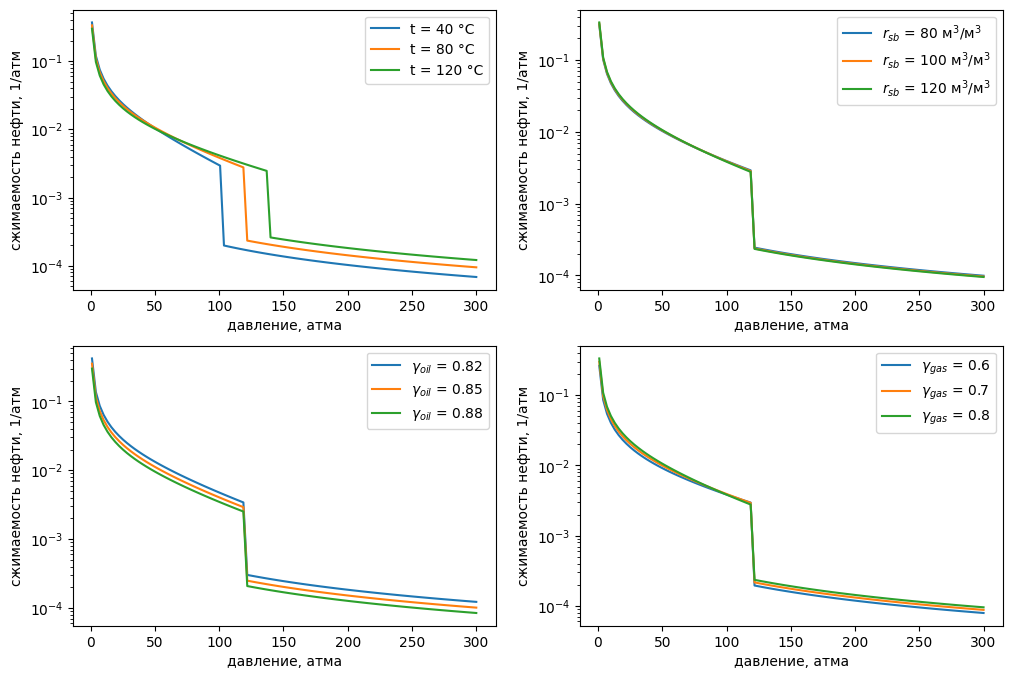

Корреляции на основе корреляции Веларде, Мак Кейна, c калибровкой по давлению насыщения
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"pb_atma":120,"t_res_C":80,"muob_cP":1,"PVT_corr_set":1}


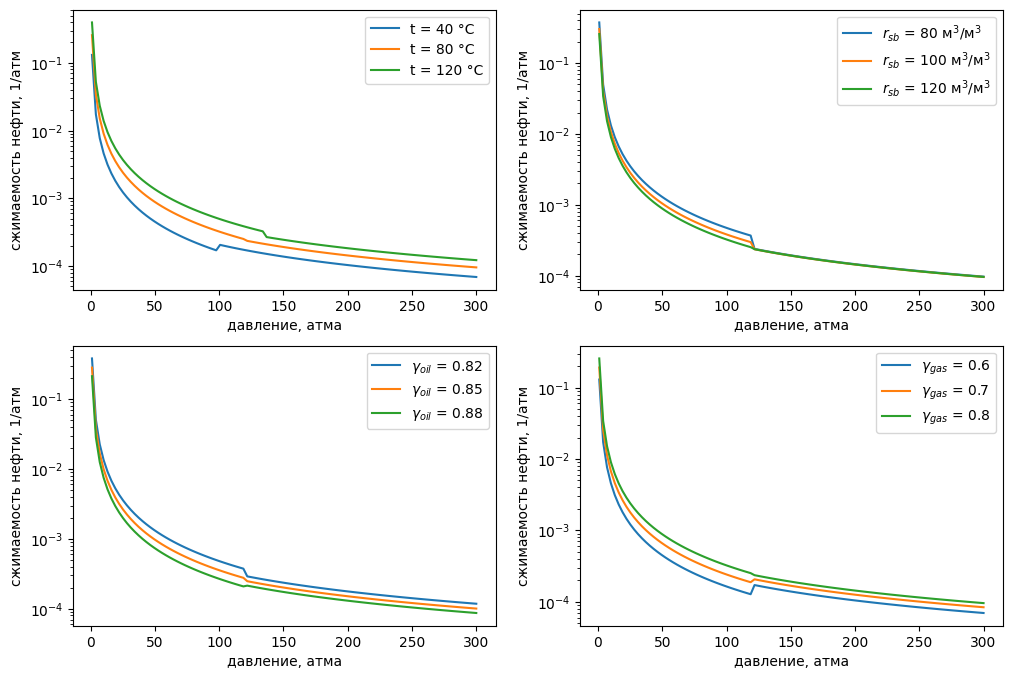

In [26]:
func = PVT_compressibility_oil_1atm
ylabel = 'сжимаемость нефти, 1/атм'
print("Корреляции на _основе_ корреляции Стендинга, без калибровки")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel, ylog=True)

print("Корреляции на основе корреляции Веларде, Мак Кейна, без калибровки")
plot_pvt(func=func, PVT_corr_set=1, pb_atma=-1, ylabel=ylabel, ylog=True)

print("Корреляции на _основе_ корреляции Стендинга, c калибровкой по давлению насыщения")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=120, muob_cP=1, ylabel=ylabel, ylog=True)

print("Корреляции на основе корреляции Веларде, Мак Кейна, c калибровкой по давлению насыщения")
plot_pvt(func=func, PVT_corr_set=1, pb_atma=120, muob_cP=1, ylabel=ylabel, ylog=True)

Корреляции не зависят от набора и калибровок
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


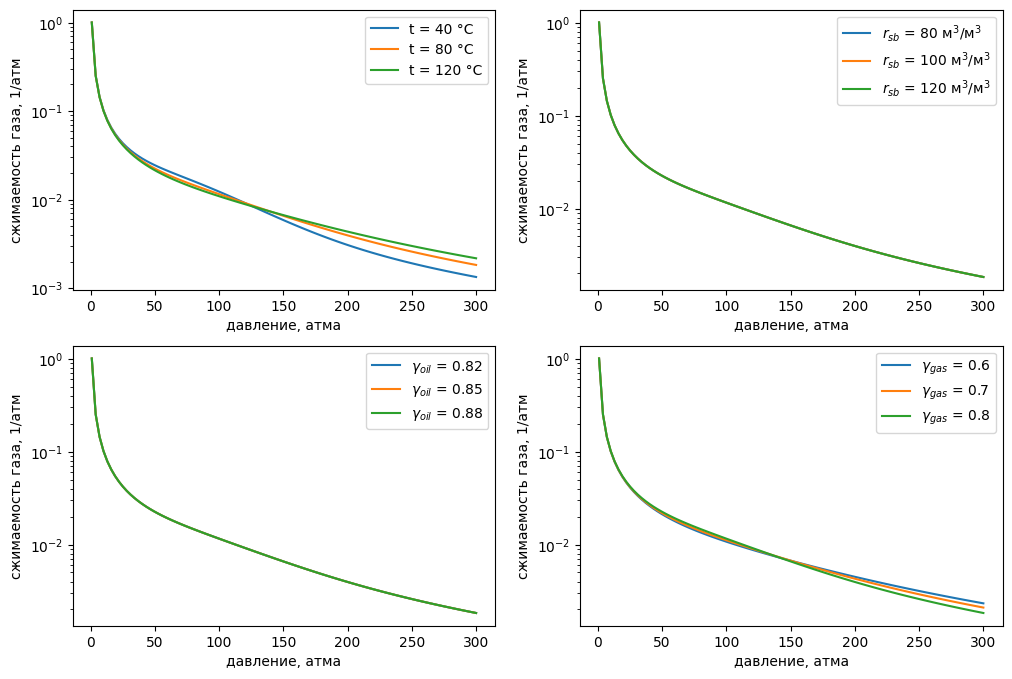

In [27]:
func = PVT_compressibility_gas_1atm
ylabel = 'сжимаемость газа, 1/атм'
print("Корреляции не зависят от набора и калибровок")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel, ylog=True)


Корреляции не зависят от набора и калибровок
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


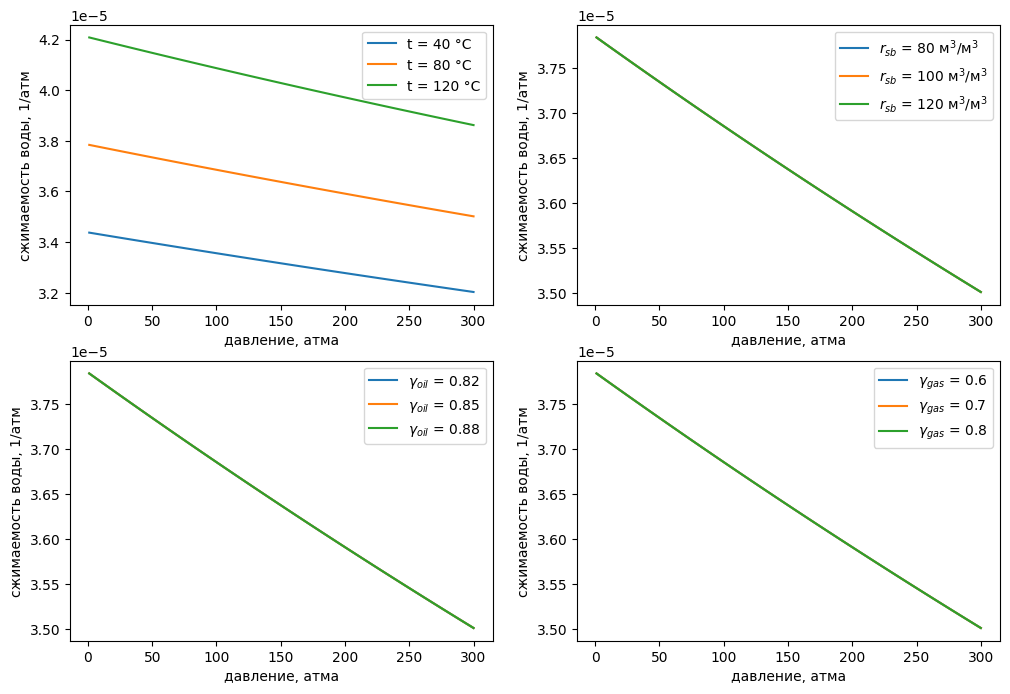

In [28]:
func = PVT_compressibility_wat_1atm
ylabel = 'сжимаемость воды, 1/атм'
print("Корреляции не зависят от набора и калибровок")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)


Корреляции не зависят от набора и калибровок
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


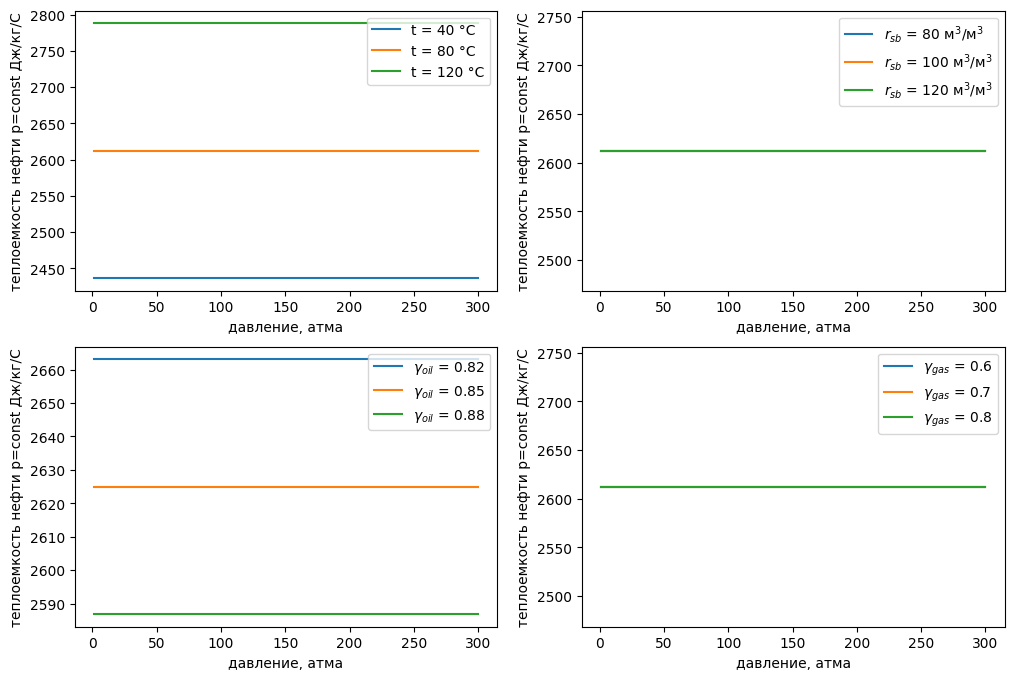

In [29]:
func = PVT_cp_oil_JkgC
ylabel = 'теплоемкость нефти p=const Дж/кг/С'
print("Корреляции не зависят от набора и калибровок")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)


Корреляции не зависят от набора и калибровок
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


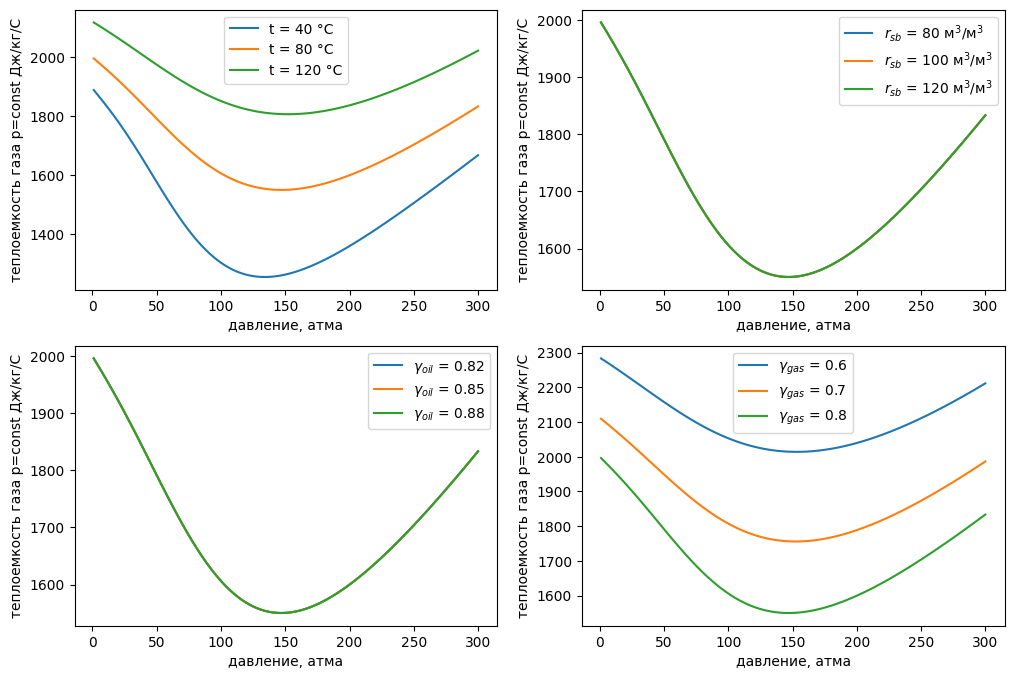

In [30]:
func = PVT_cp_gas_JkgC
ylabel = 'теплоемкость газа p=const Дж/кг/С'
print("Корреляции не зависят от набора и калибровок")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)


Корреляции не зависят от набора и калибровок
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


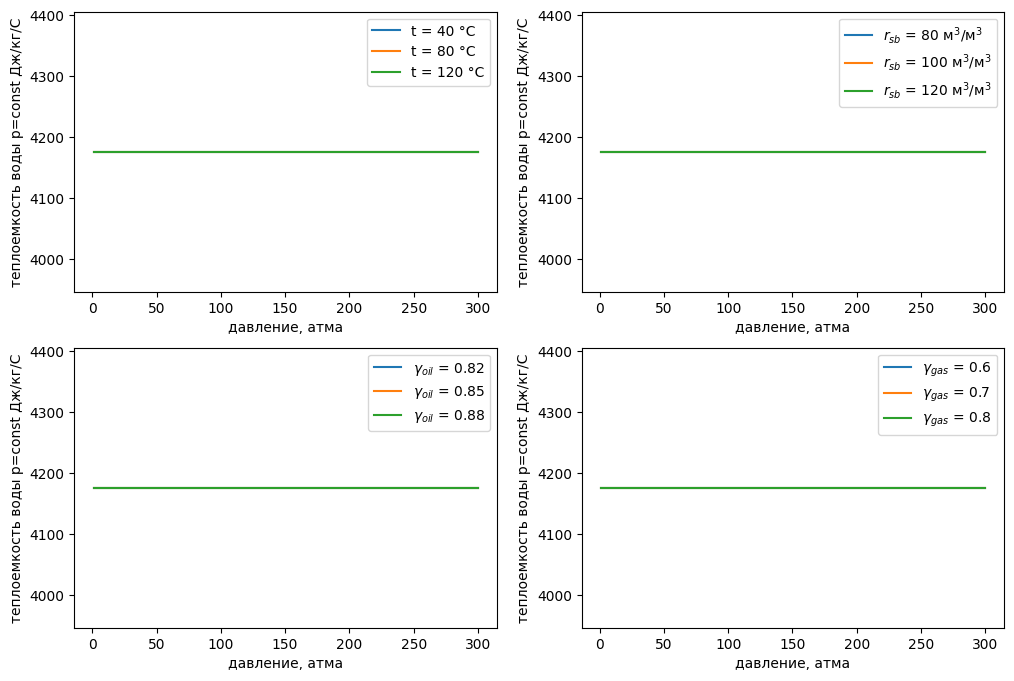

In [31]:
func = PVT_cp_wat_JkgC
ylabel = 'теплоемкость воды p=const Дж/кг/С'
print("Корреляции не зависят от набора и калибровок")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)


Корреляции не зависят от набора и калибровок
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


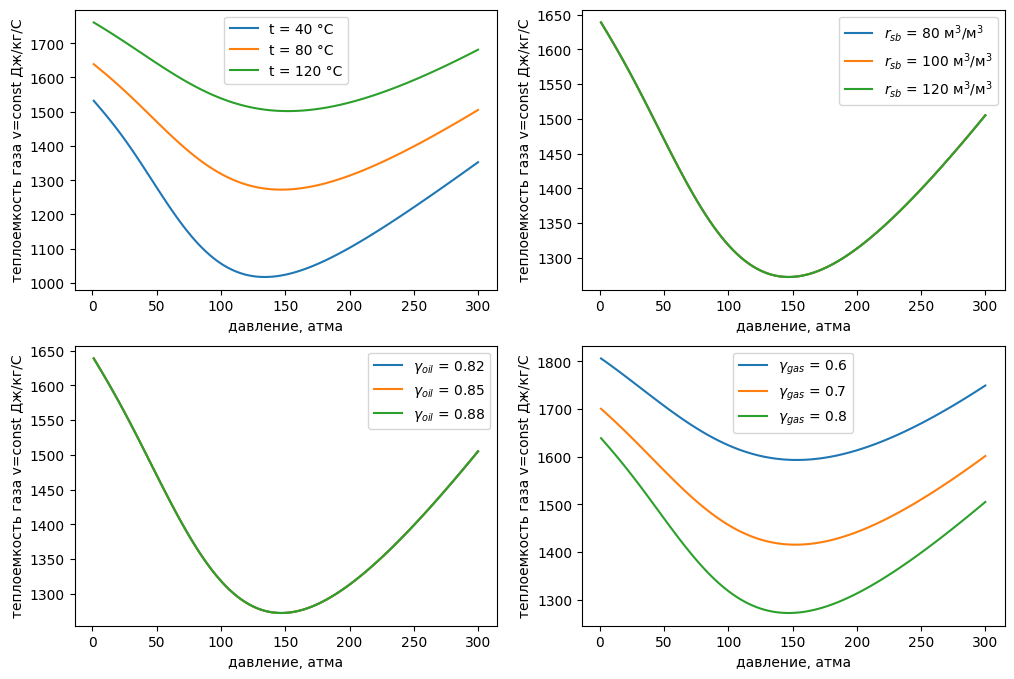

In [32]:
func = PVT_cv_gas_JkgC
ylabel = 'теплоемкость газа v=const Дж/кг/С'
print("Корреляции не зависят от набора и калибровок")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)


Корреляции не зависят от набора и калибровок
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


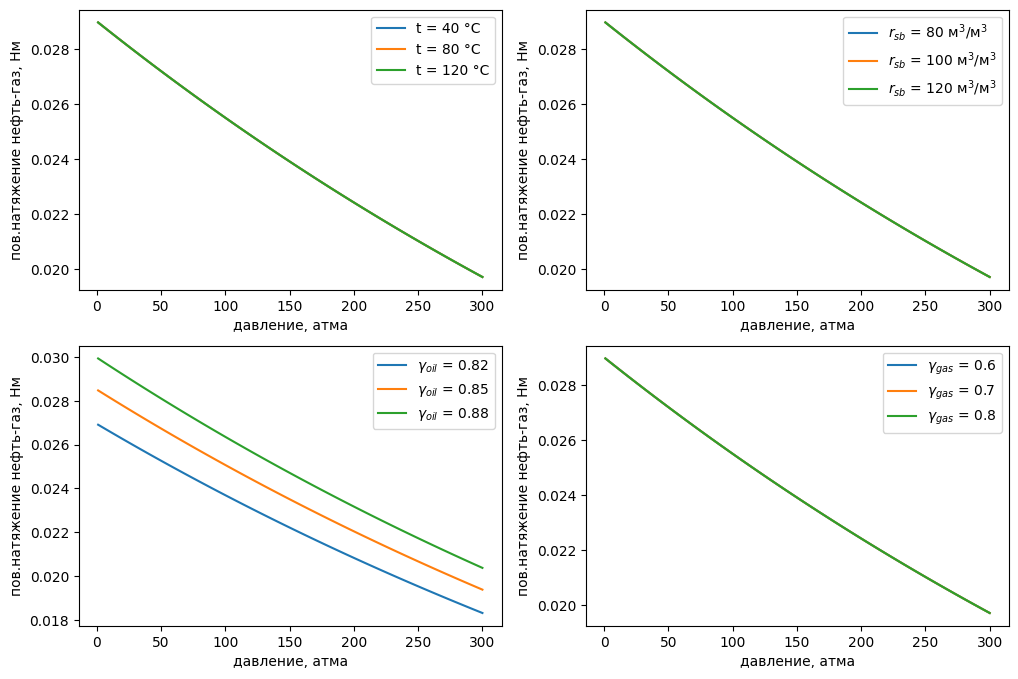

In [33]:
func = PVT_ST_oilgas_Nm
ylabel = 'пов.натяжение нефть-газ, Нм'
print("Корреляции не зависят от набора и калибровок")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)


Корреляции не зависят от набора и калибровок
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


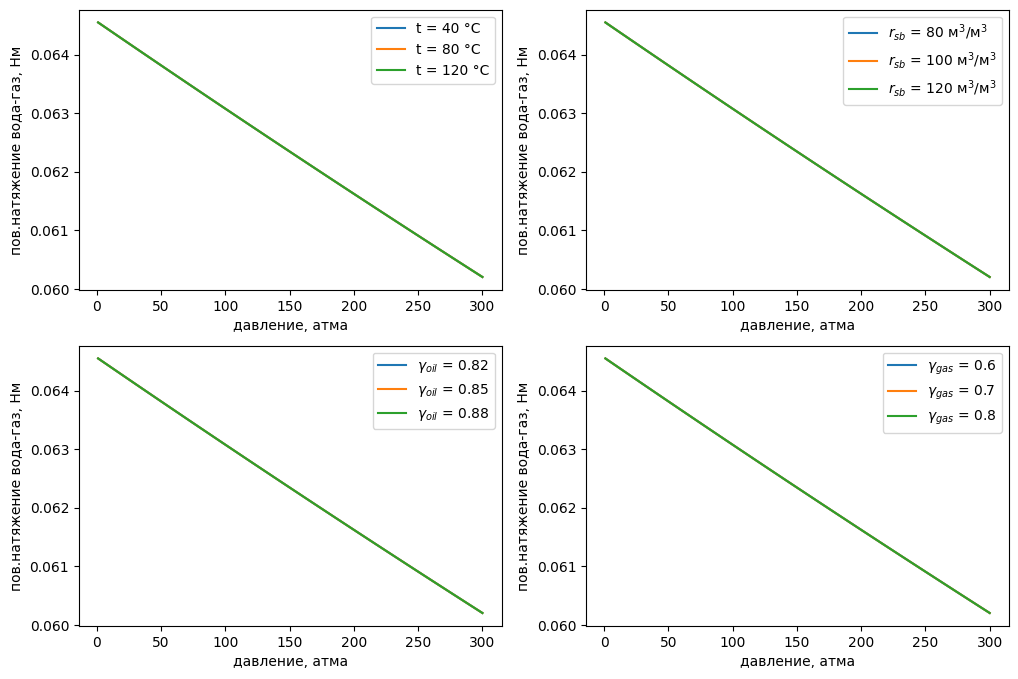

In [34]:
func = PVT_ST_watgas_Nm
ylabel = 'пов.натяжение вода-газ, Нм'
print("Корреляции не зависят от набора и калибровок")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)


Корреляции не зависят от набора и калибровок
{"gamma_gas":0.8,"gamma_oil":0.86,"gamma_wat":1.1,"rsb_m3m3":120,"PVT_corr_set":0}


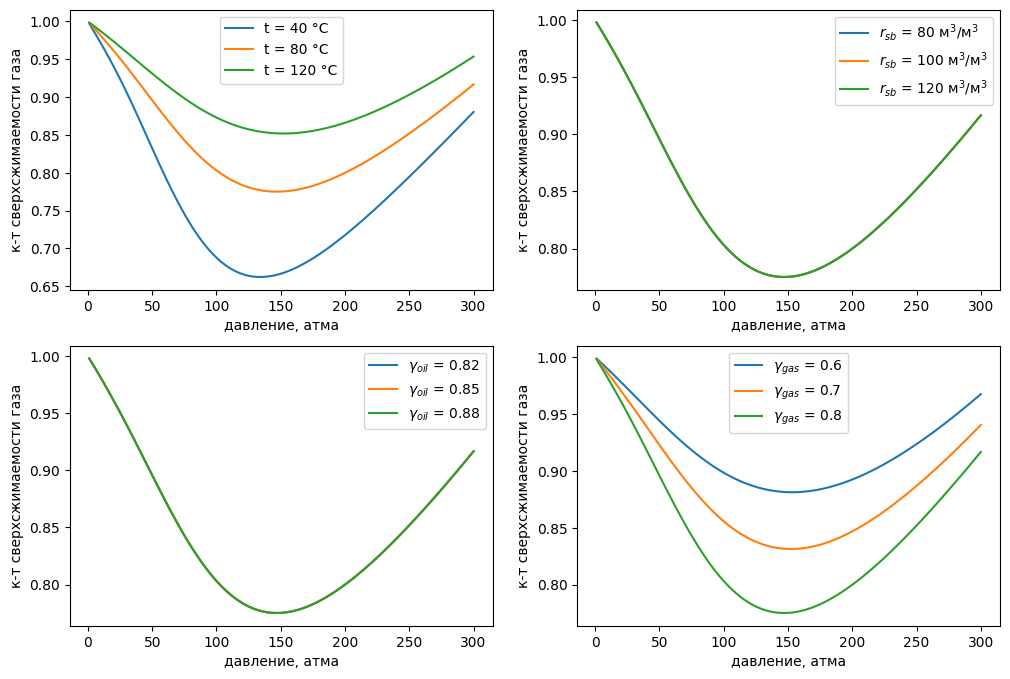

In [35]:
func = PVT_z
ylabel = 'к-т сверхсжимаемости газа'
print("Корреляции не зависят от набора и калибровок")
plot_pvt(func=func, PVT_corr_set=0, pb_atma=-1, ylabel=ylabel)
